## KDD Project
##Prudential Life Insurance Assessment
###Tream Members
###Aditi Duggal (10460663)
###Shreya Mahadik (10467745)
###Parth Ambalkar (10467986)
###Pinak Pathak (10472891)

In [ ]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###EDA

In [ ]:
insurance_df = pd.read_csv('/content/drive/MyDrive/train.csv')
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [ ]:
insurance_df.shape

(59381, 128)

In [ ]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


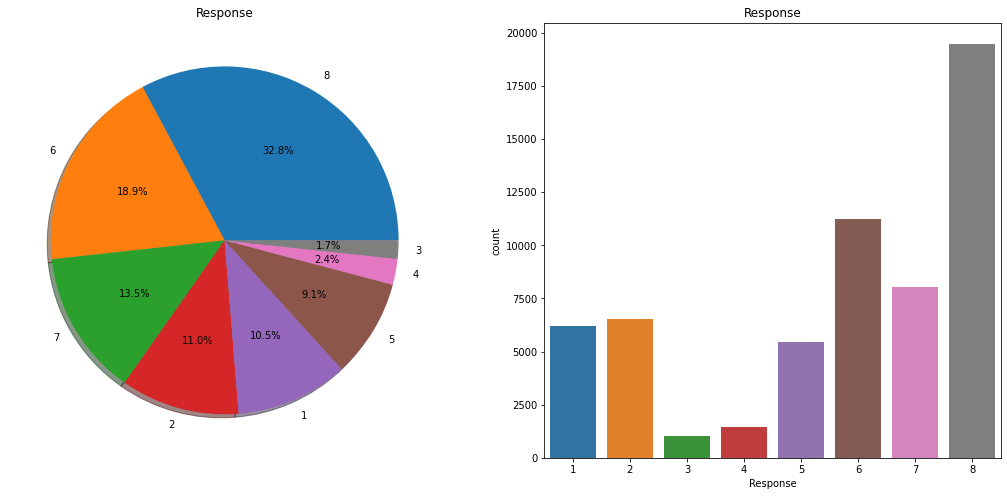

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
insurance_df['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=insurance_df,ax=ax[1])
ax[1].set_title('Response')
plt.show()

In [ ]:
#Combining the Categores to 3 categories
insurance_df['Modified_Response']  = insurance_df['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

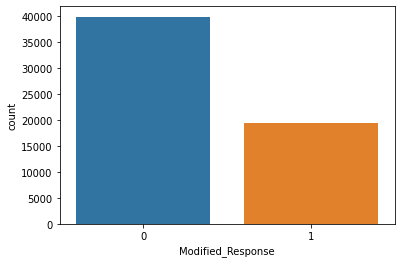

In [ ]:
sns.countplot(x= insurance_df['Modified_Response'])

In [ ]:
# Dropping old response columns
insurance_df.drop('Response',axis = 1, inplace=True)

In [ ]:
# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


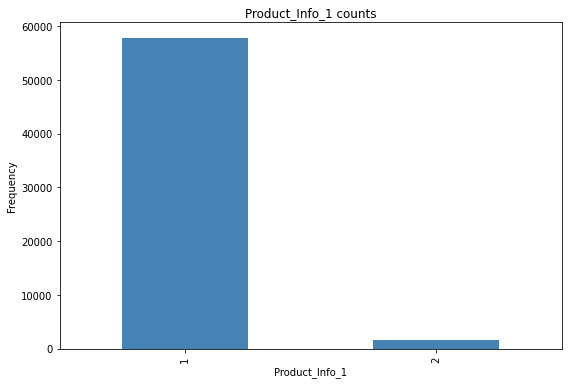

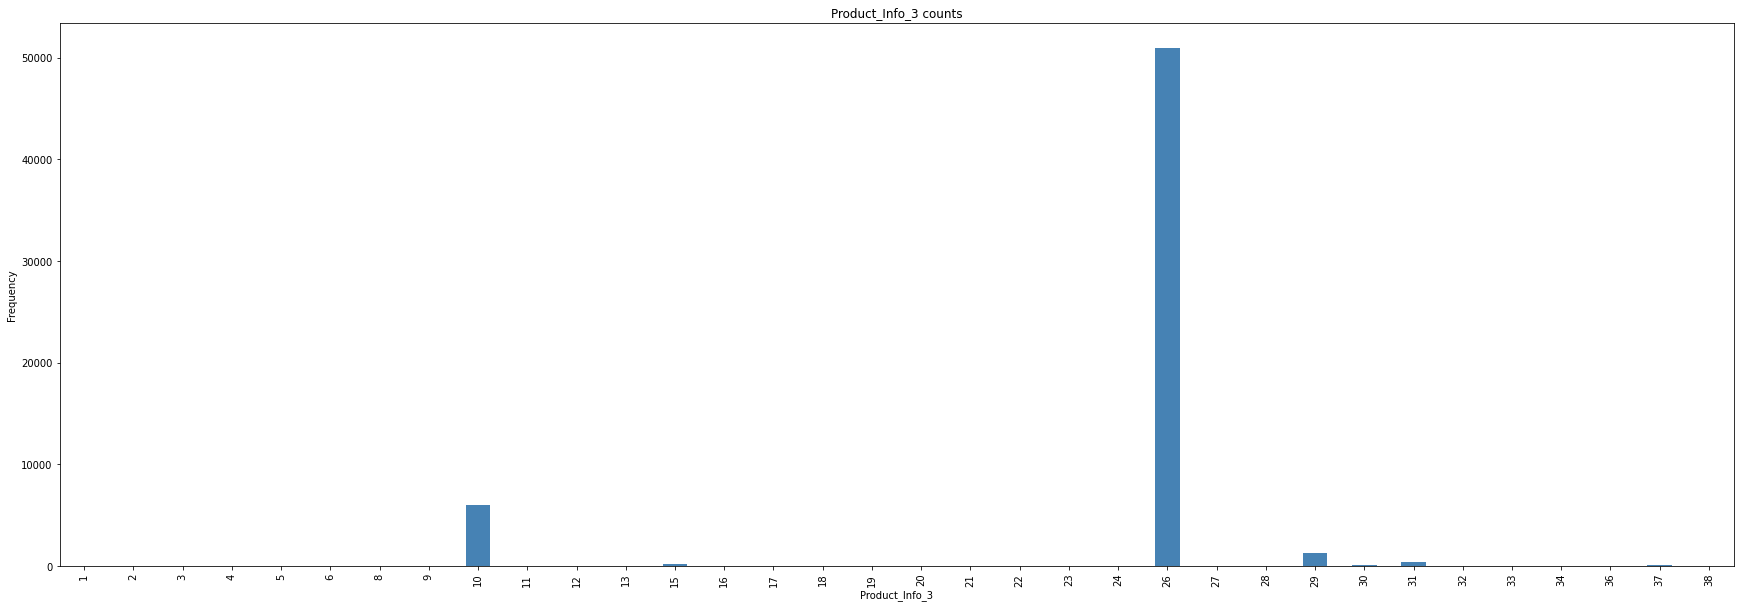

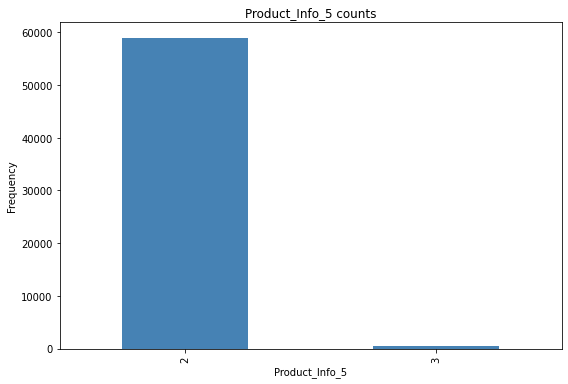

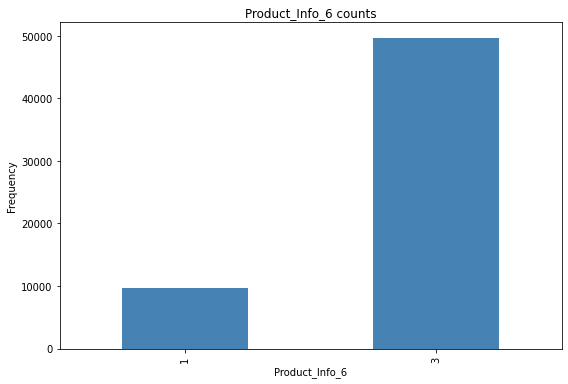

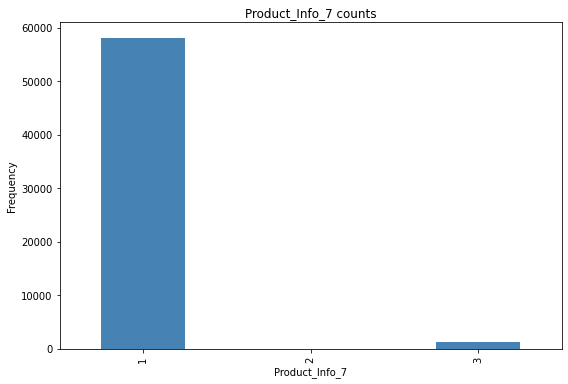

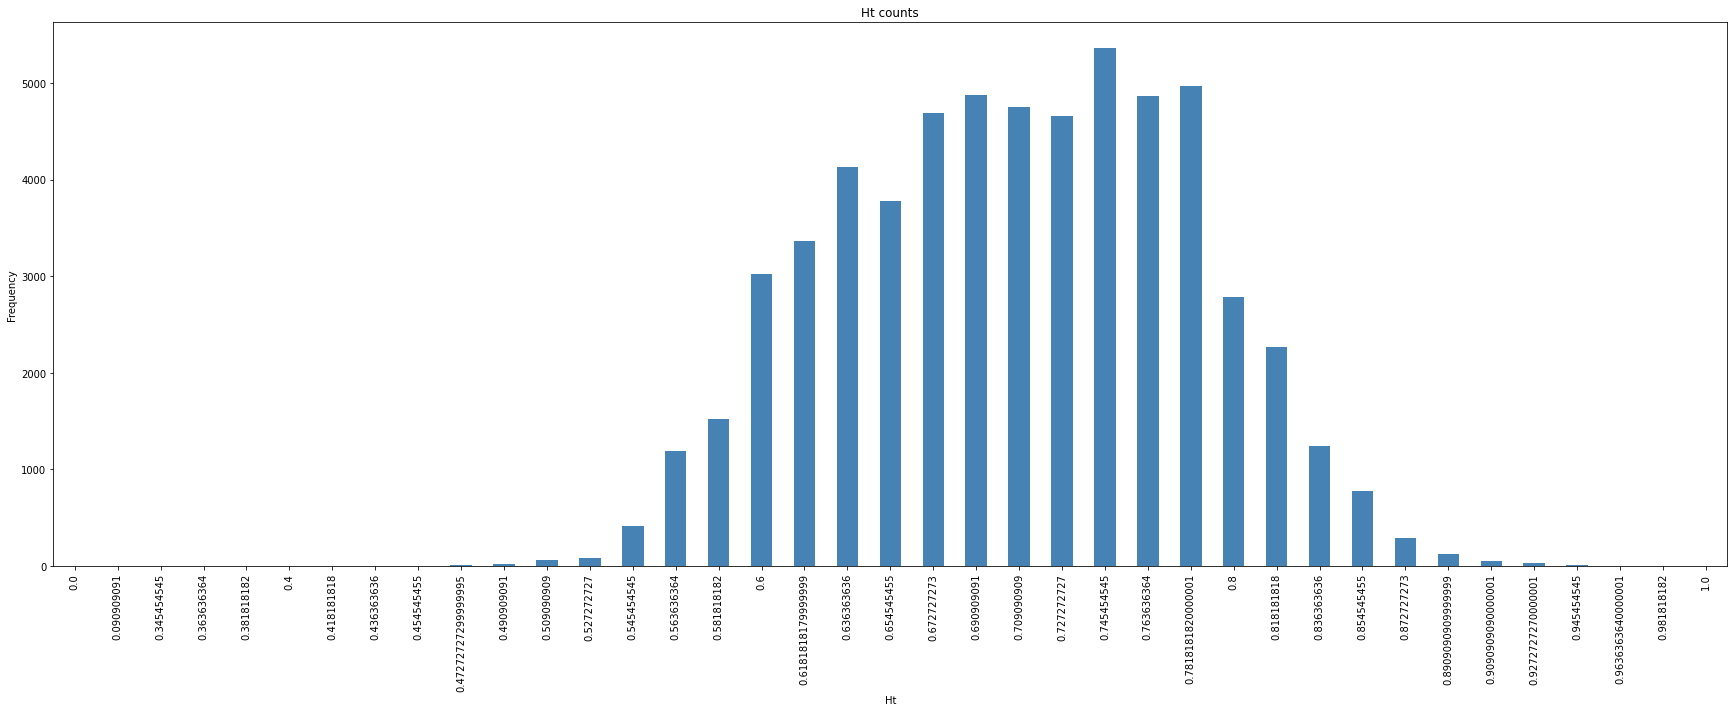

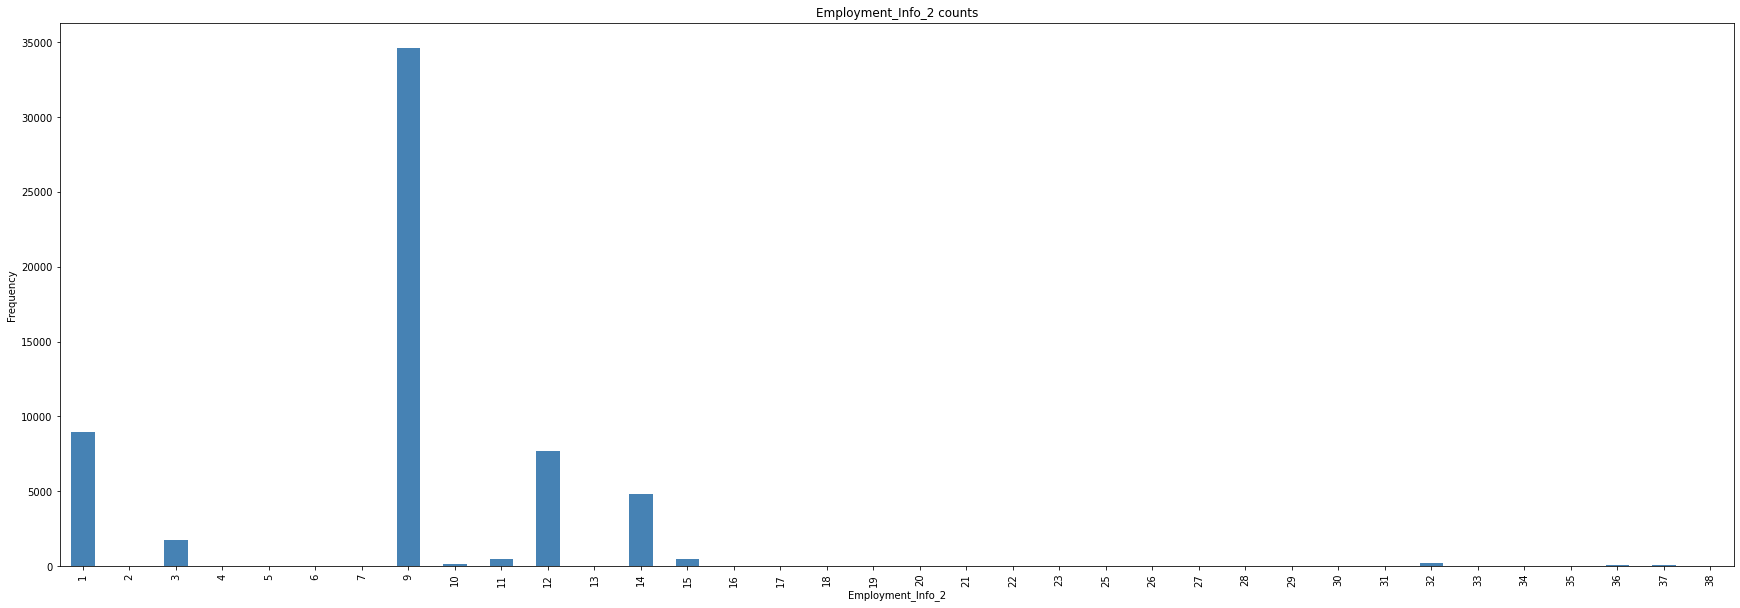

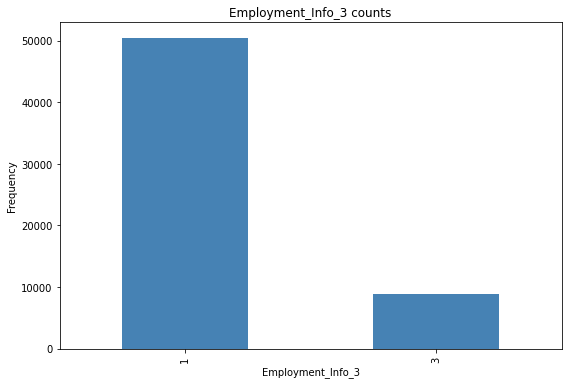

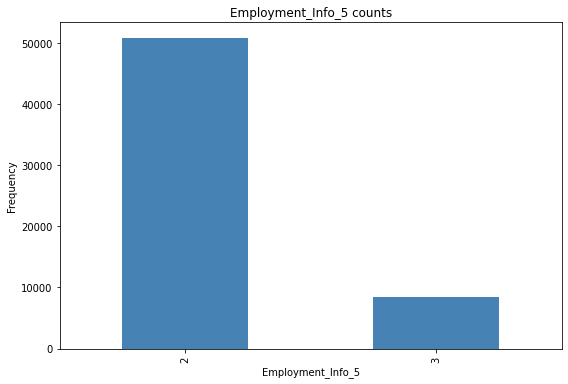

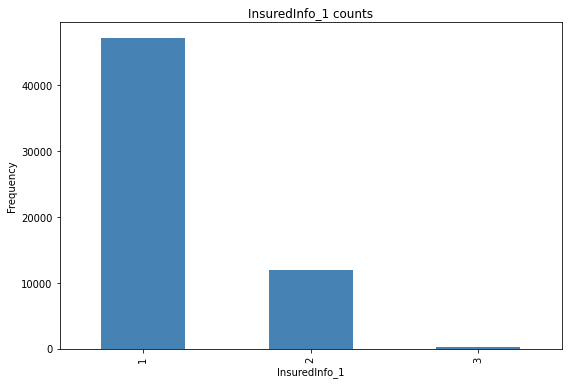

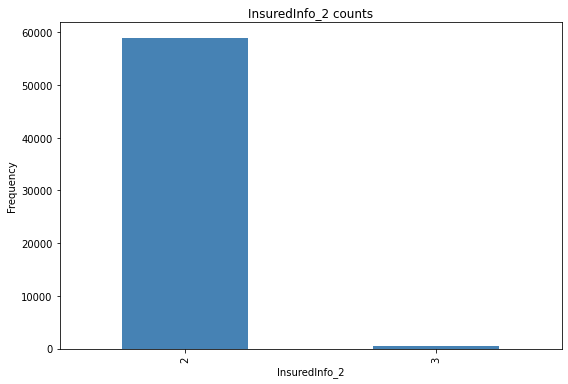

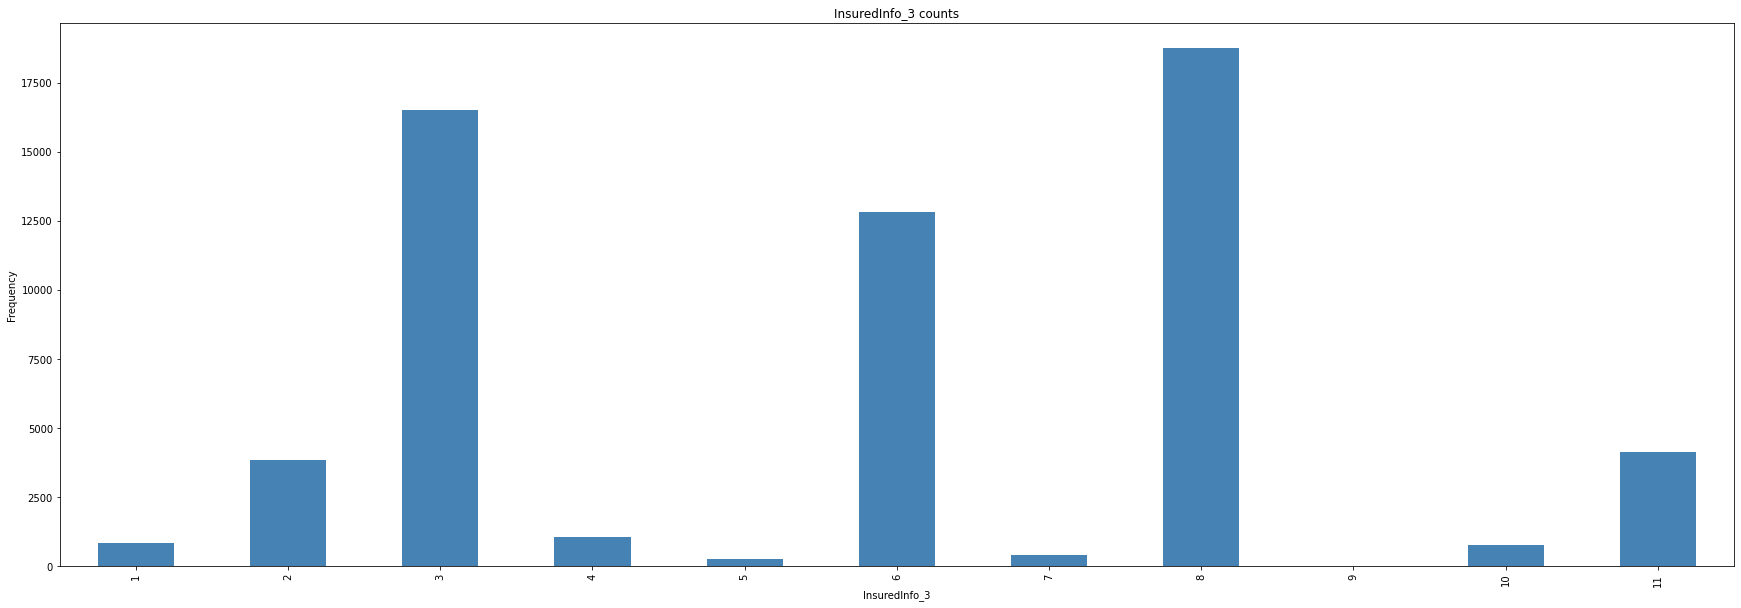

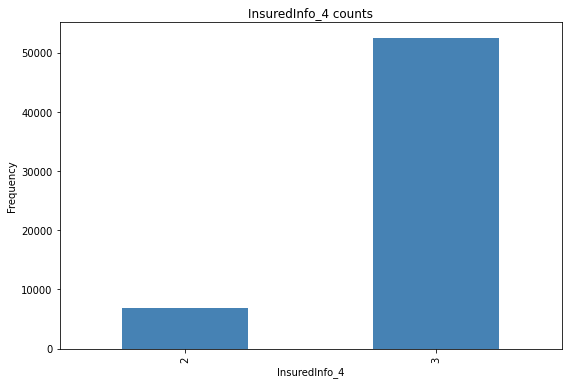

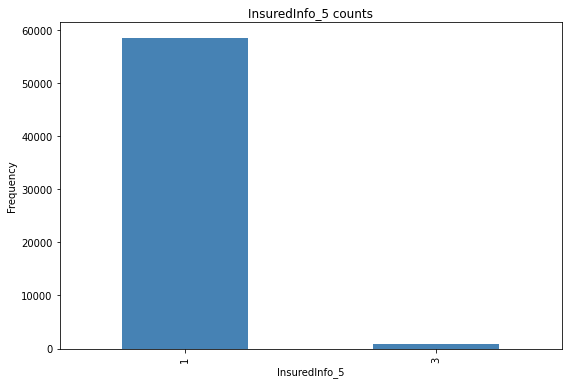

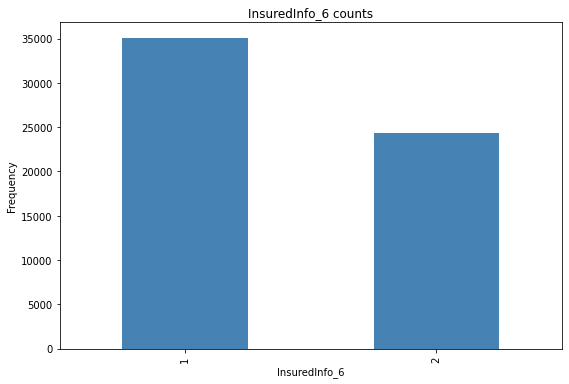

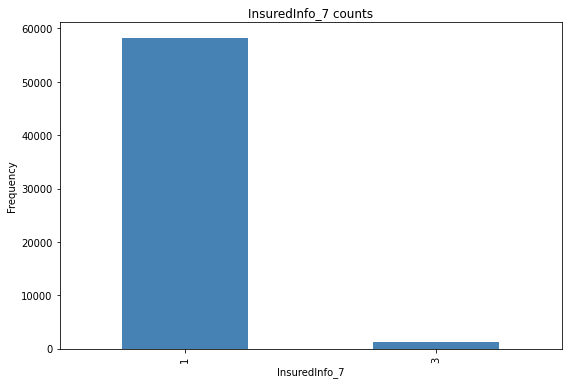

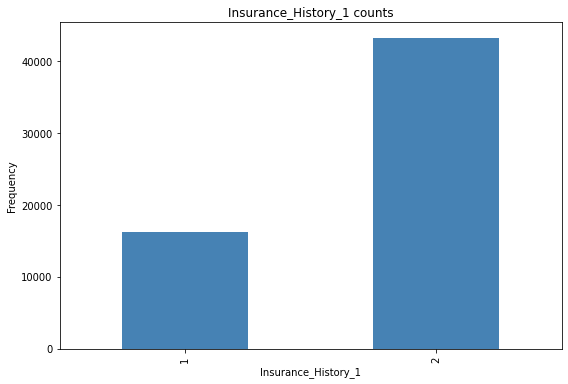

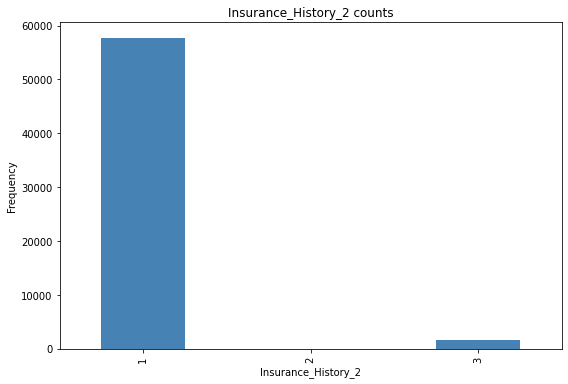

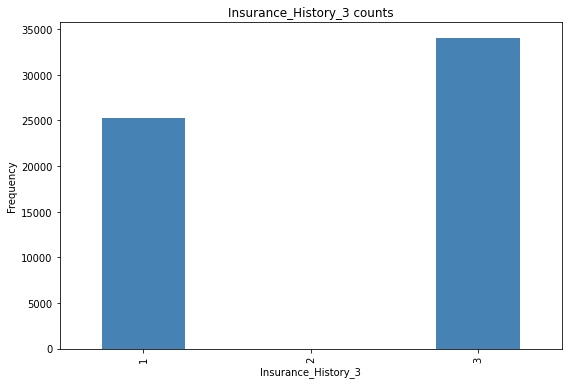

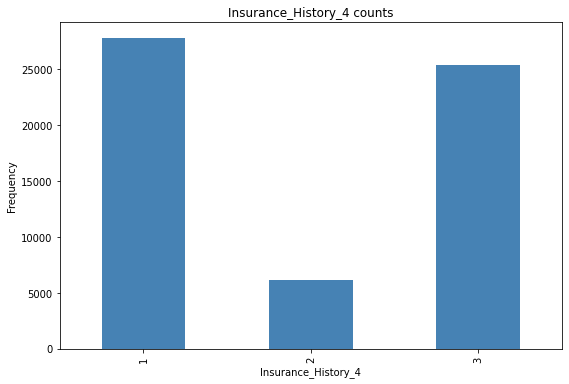

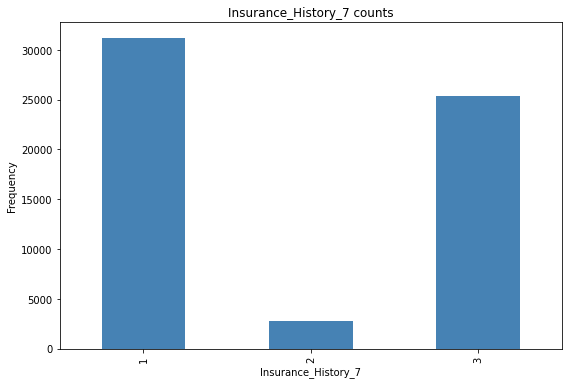

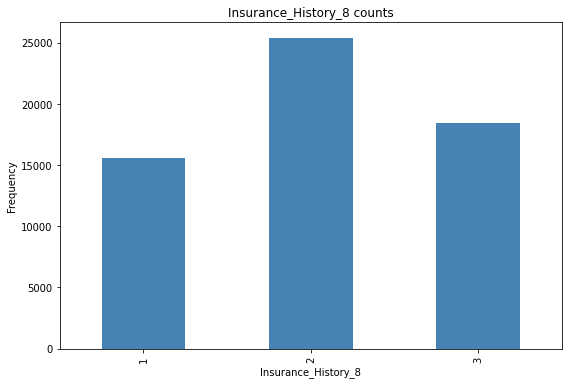

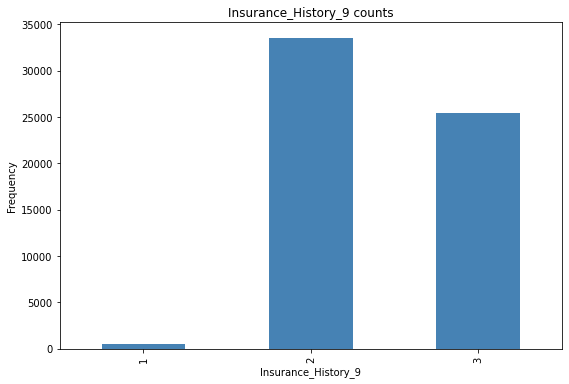

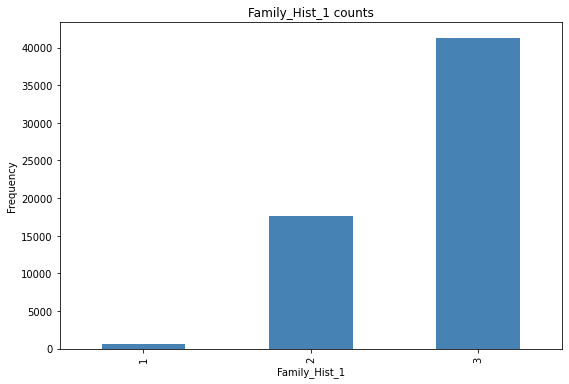

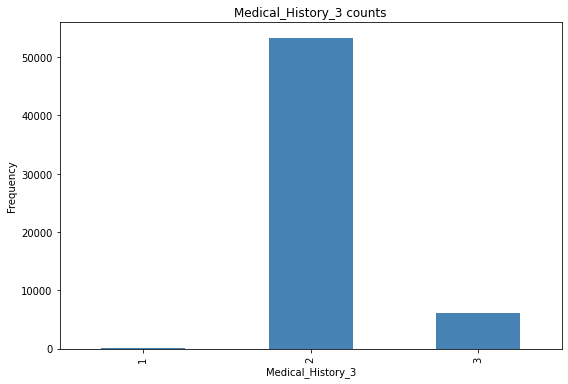

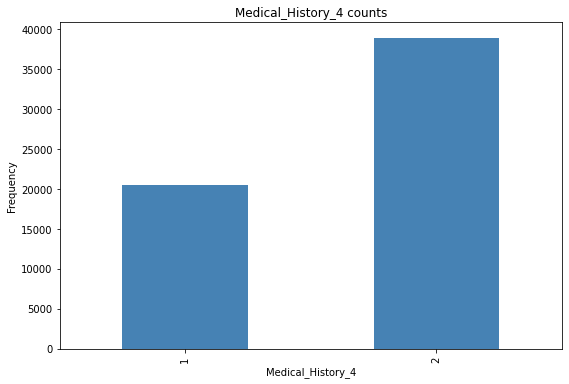

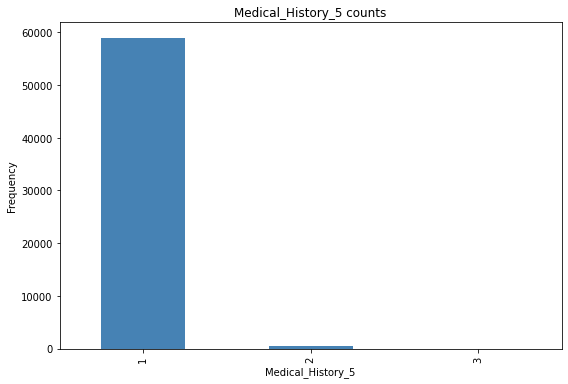

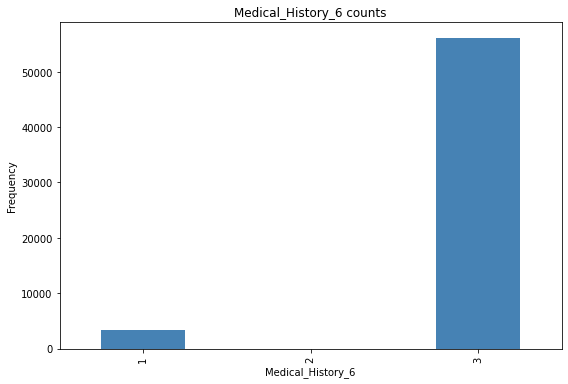

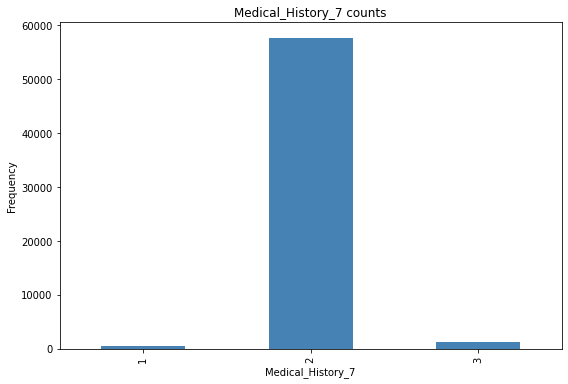

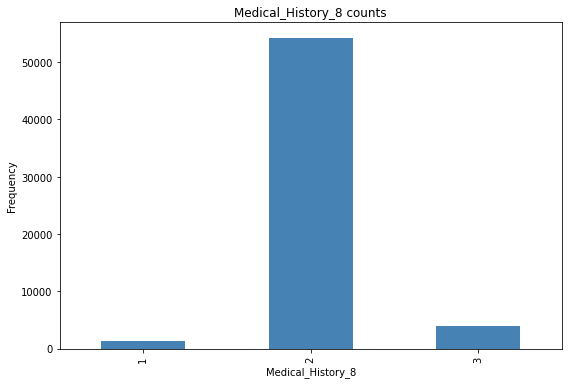

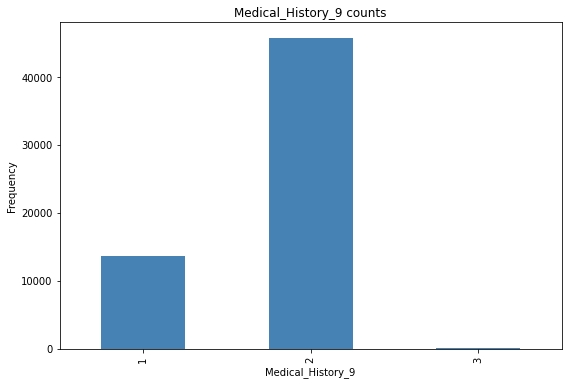

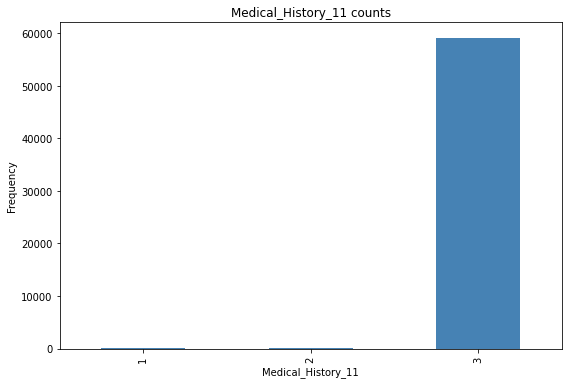

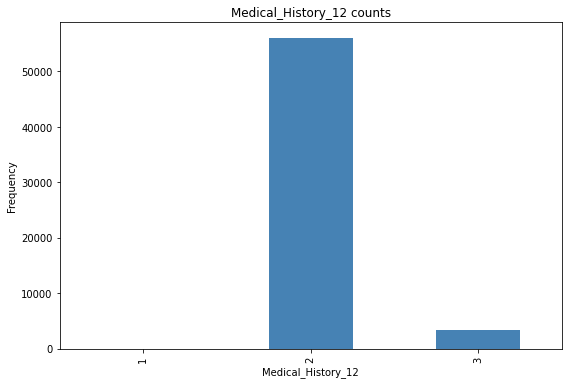

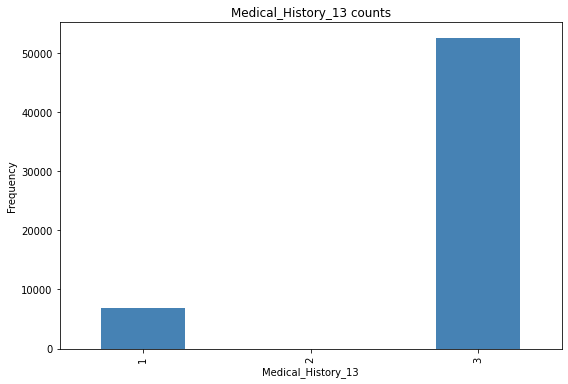

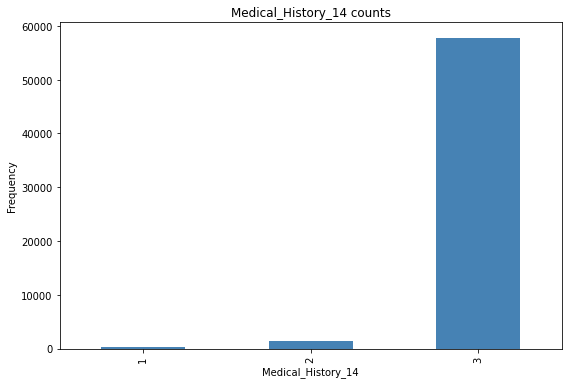

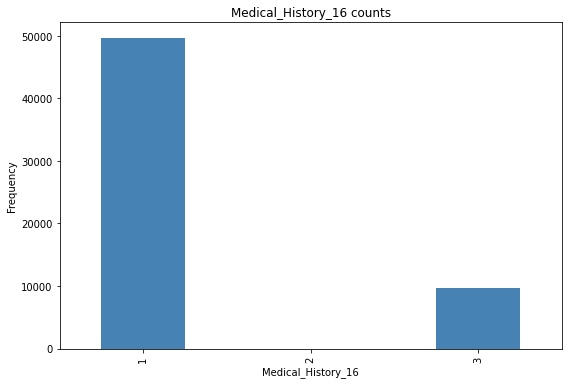

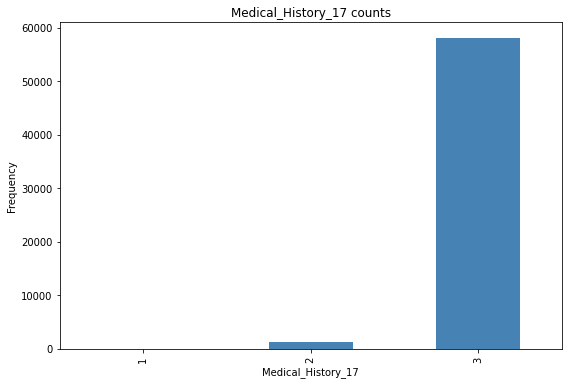

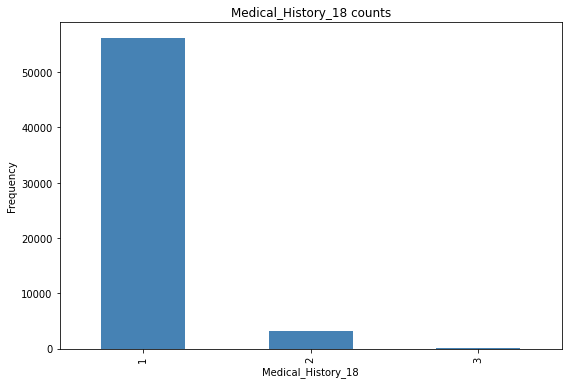

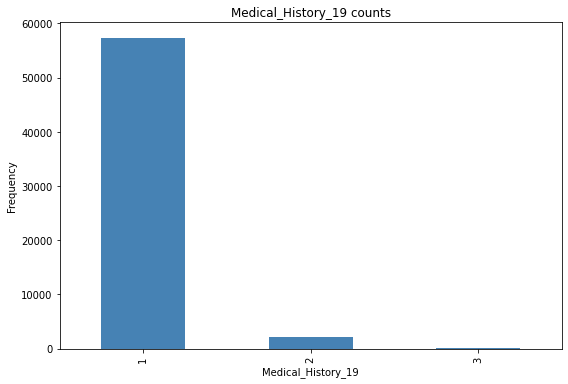

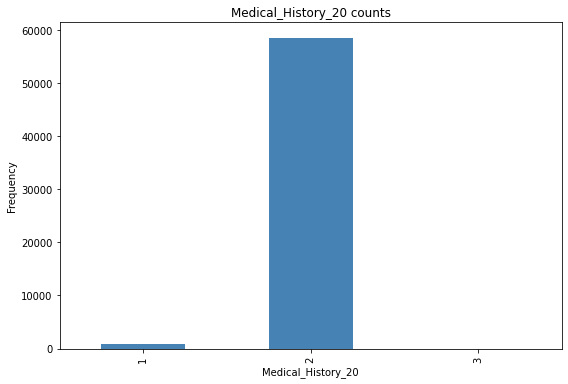

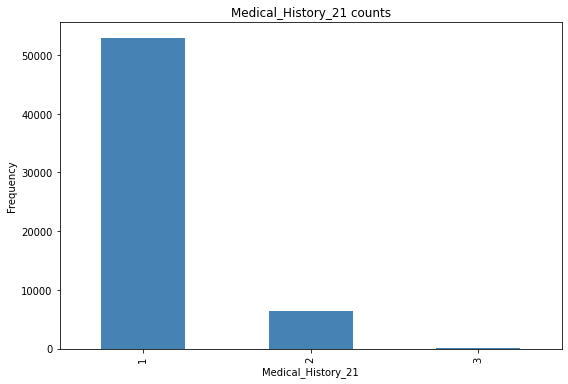

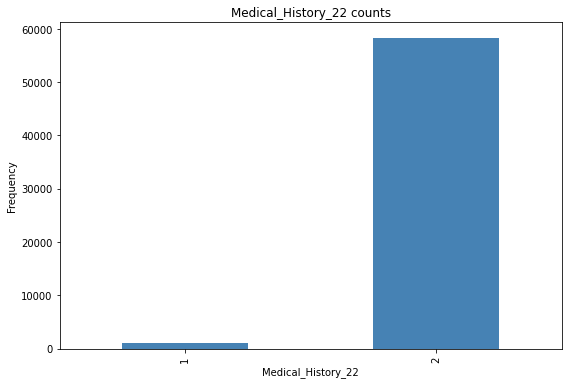

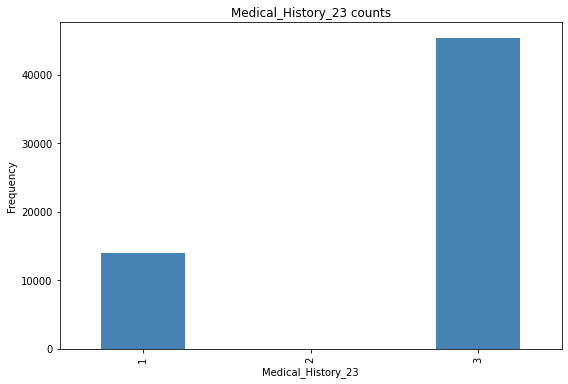

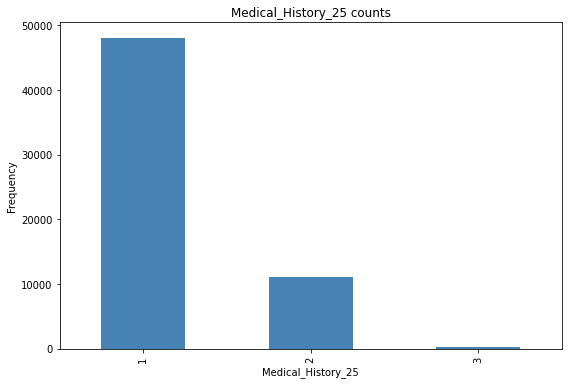

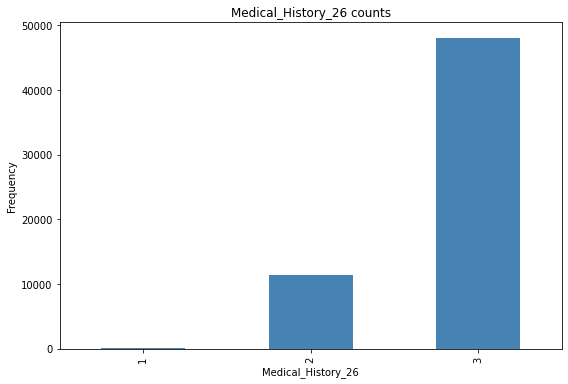

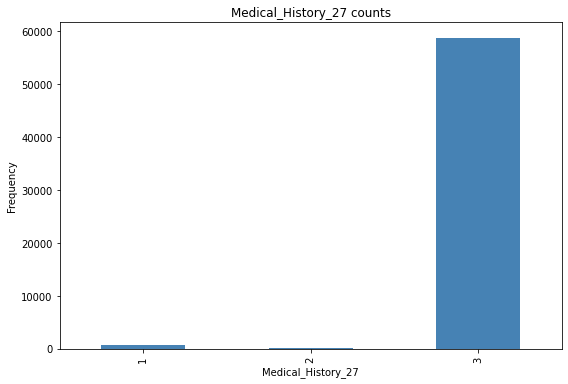

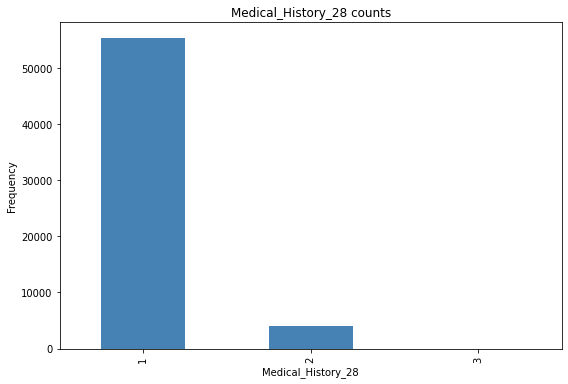

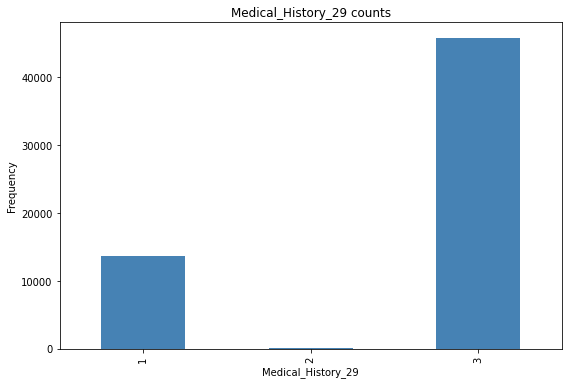

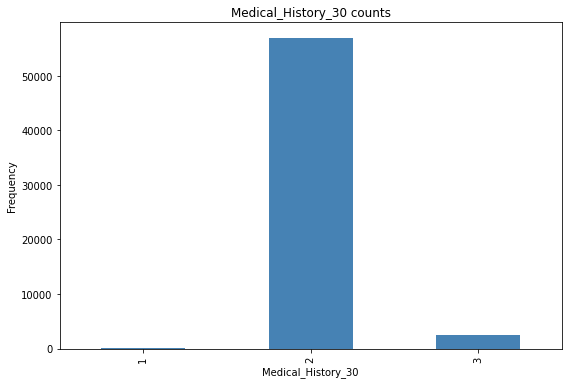

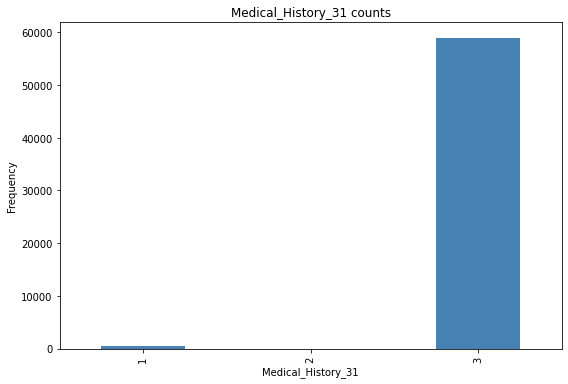

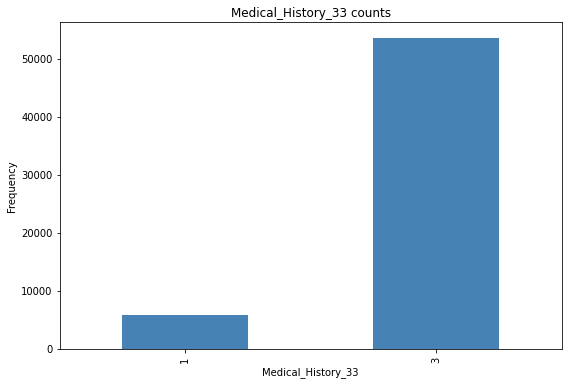

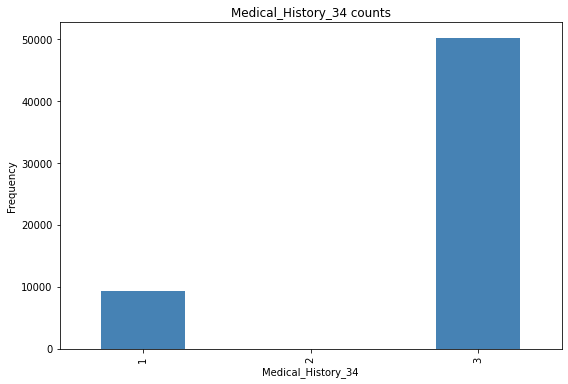

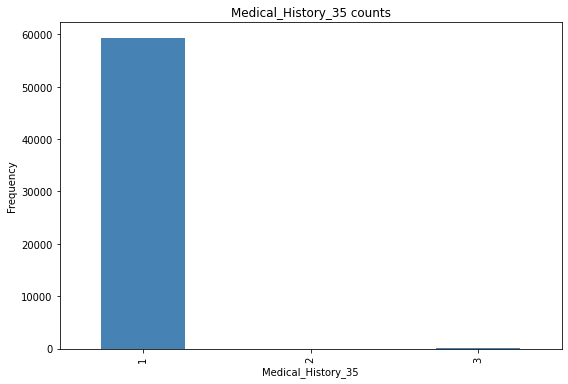

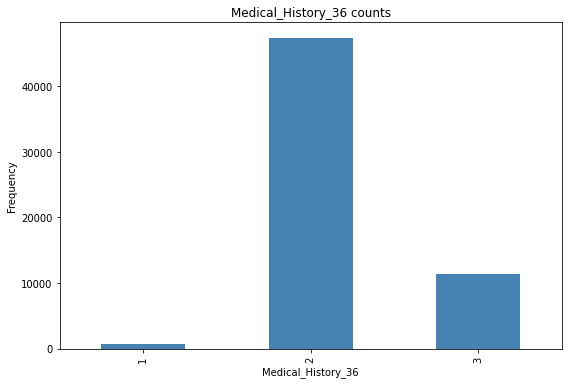

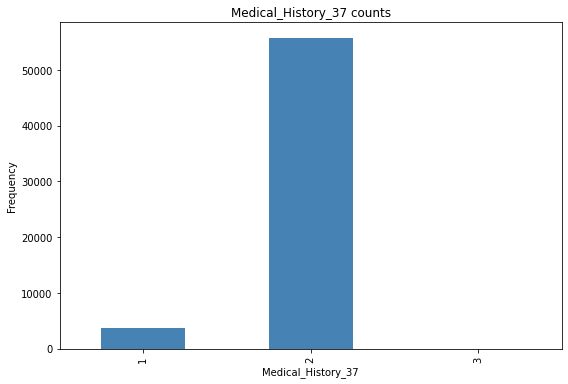

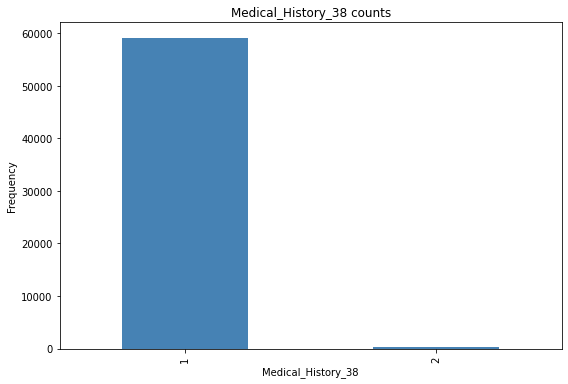

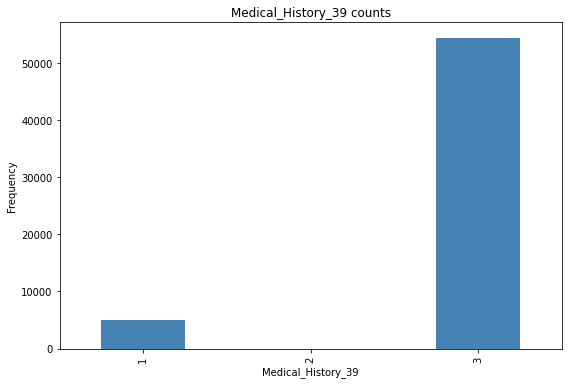

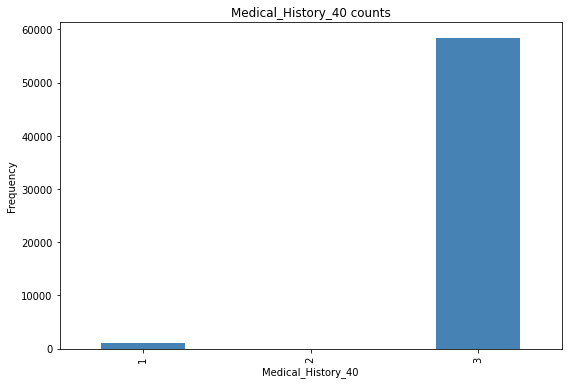

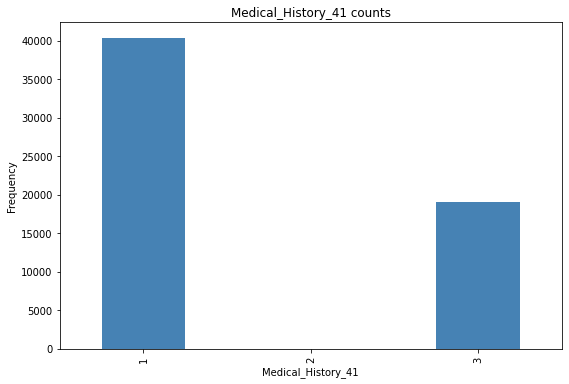

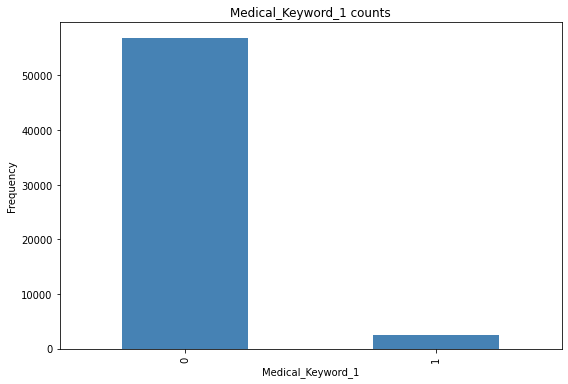

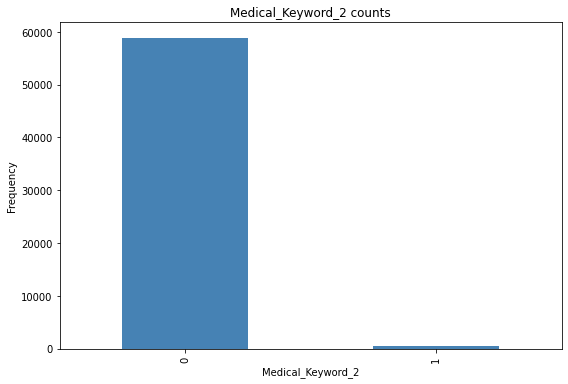

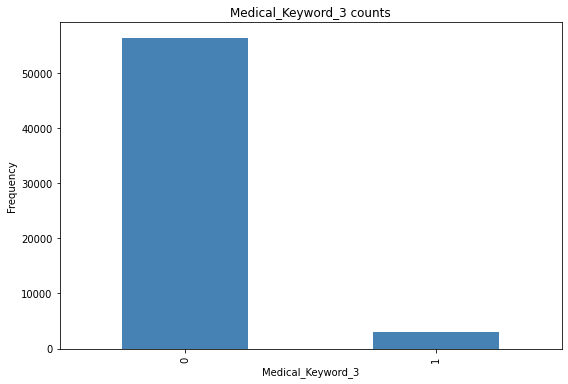

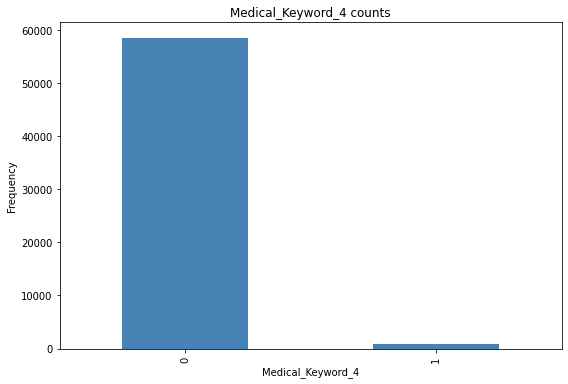

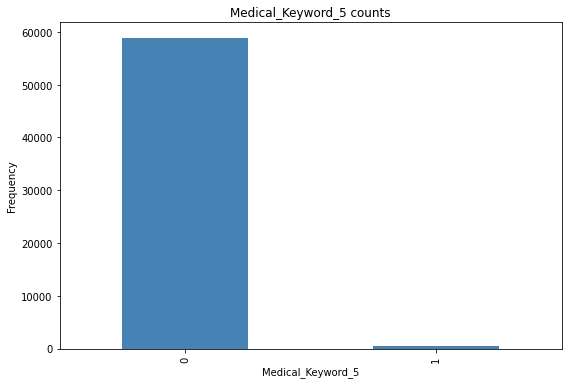

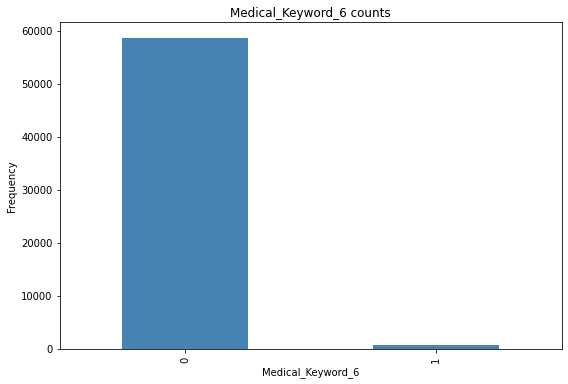

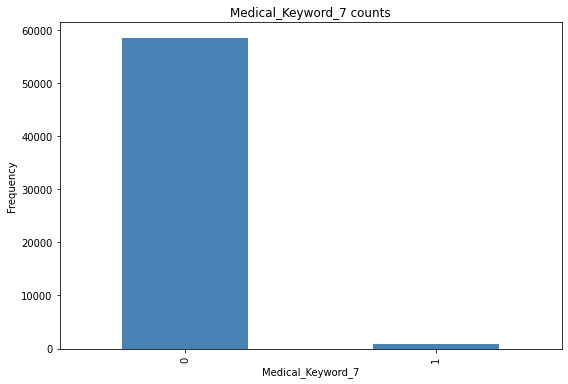

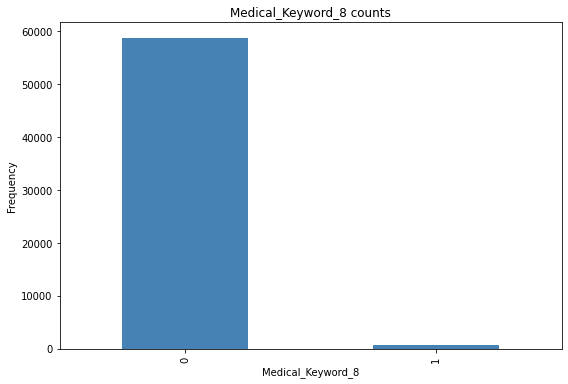

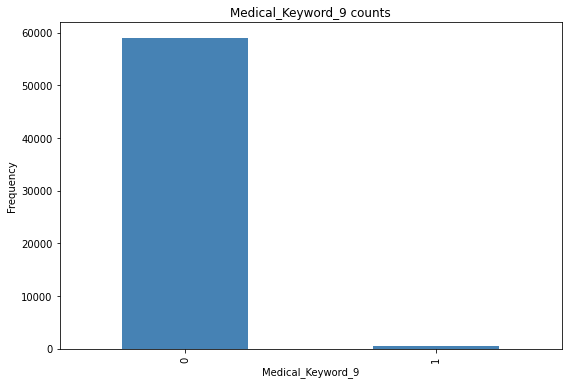

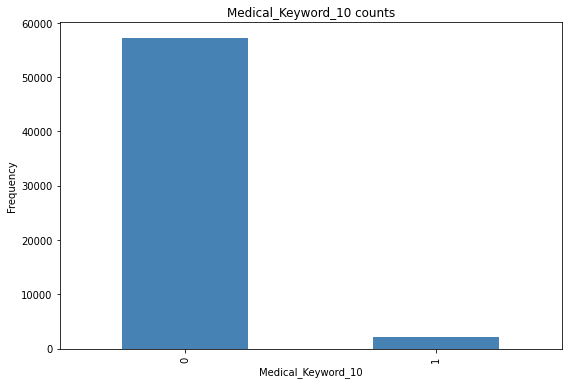

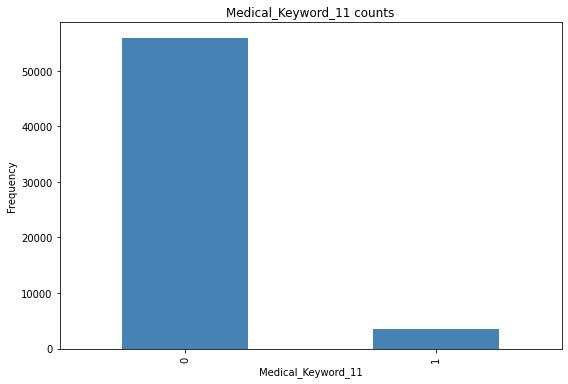

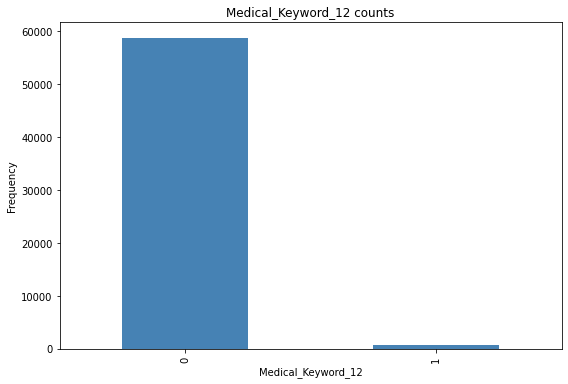

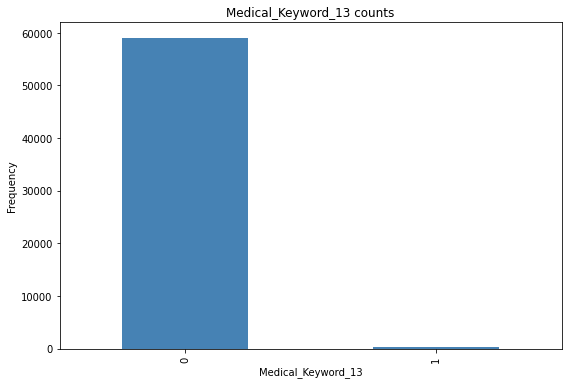

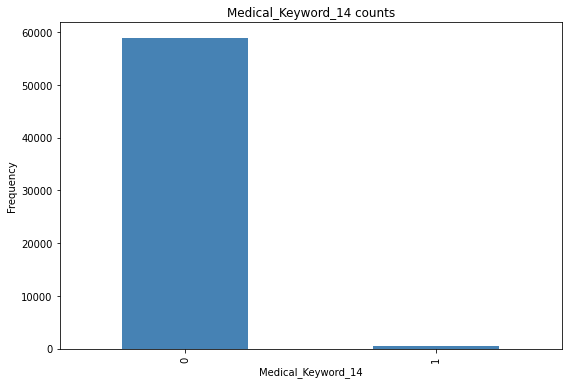

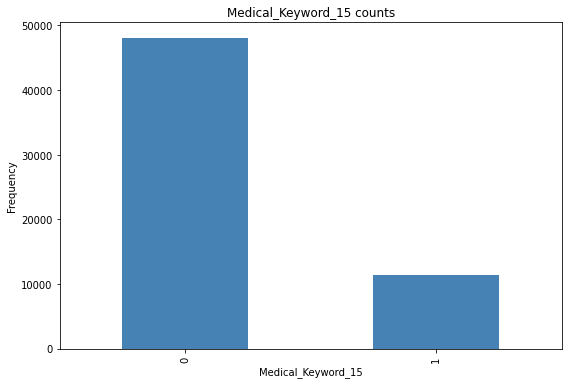

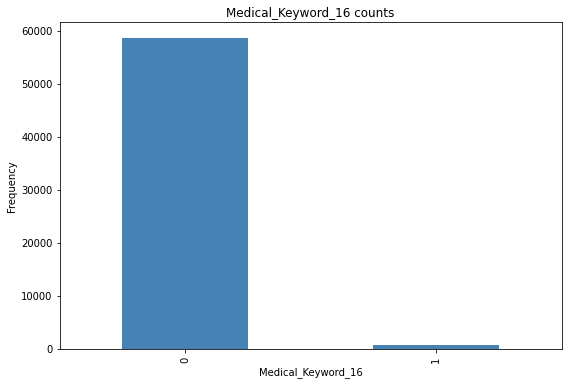

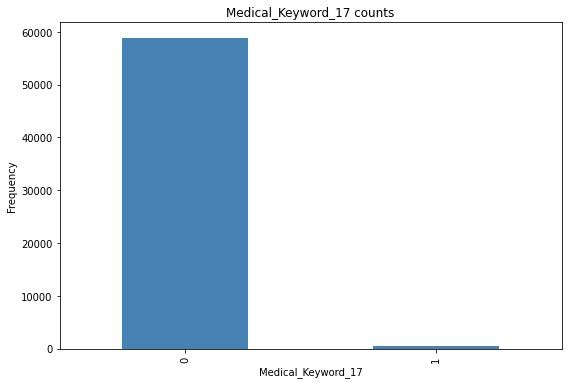

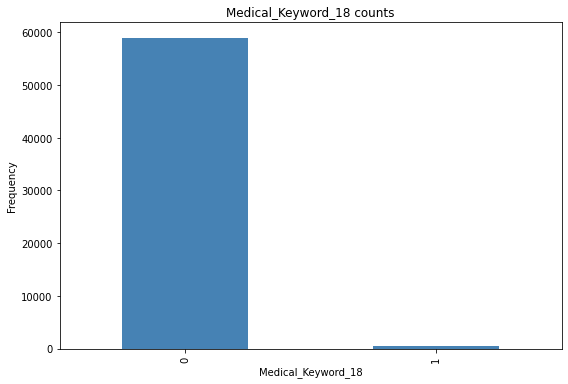

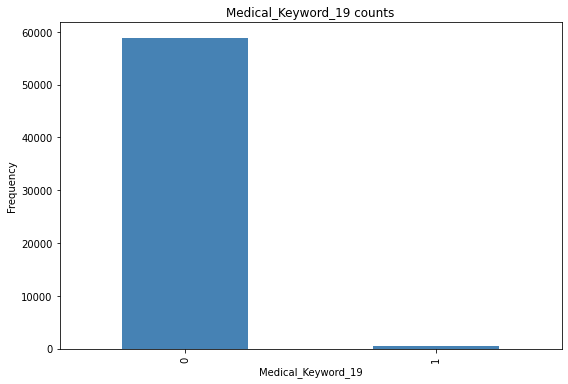

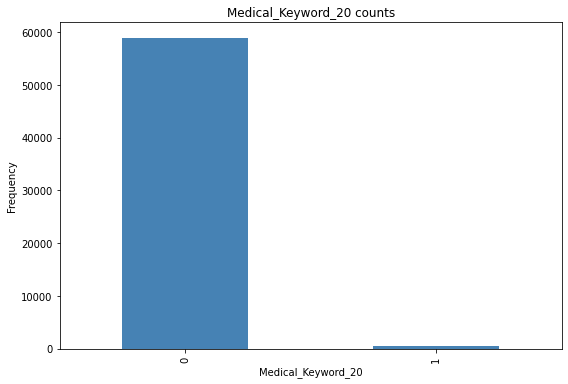

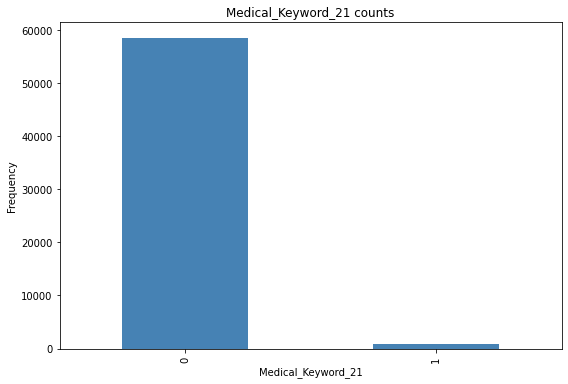

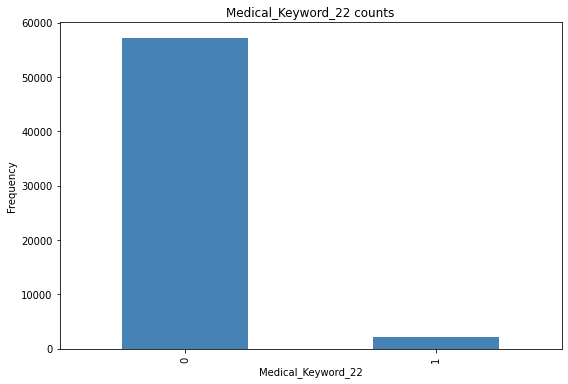

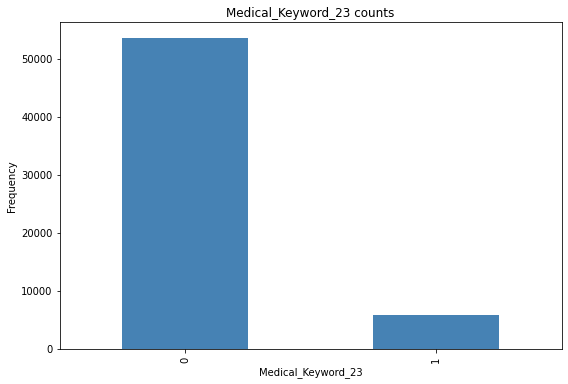

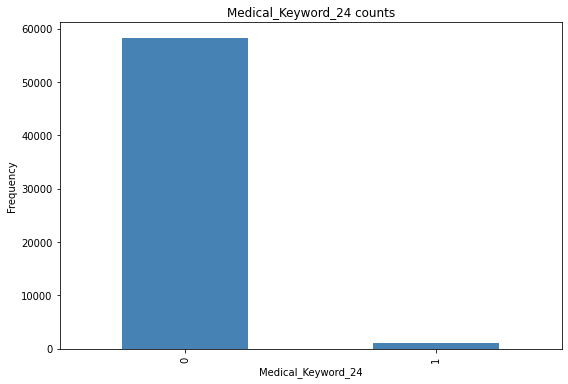

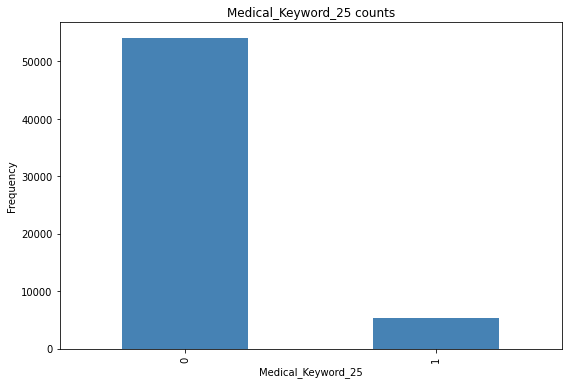

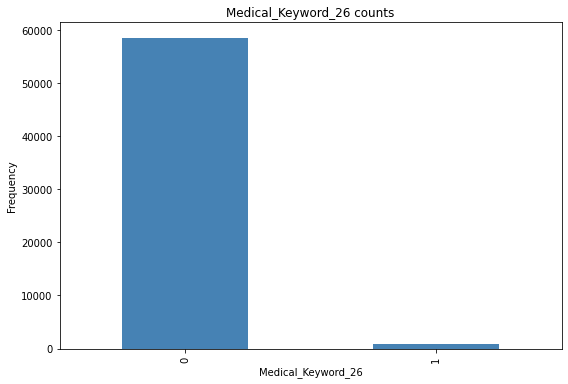

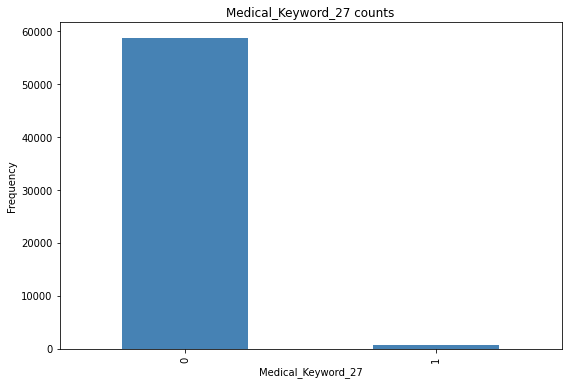

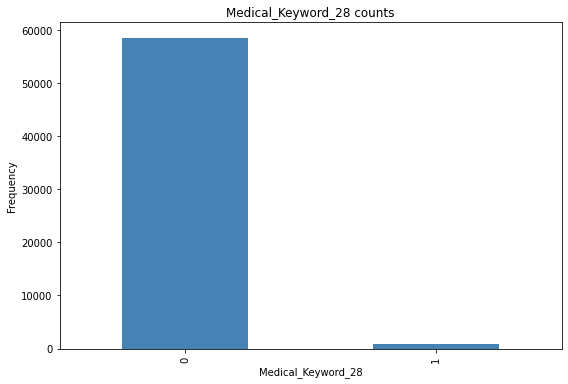

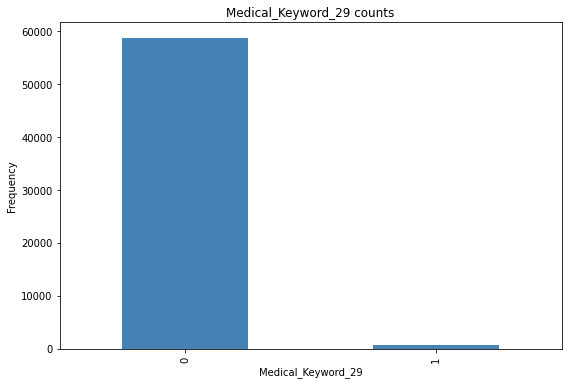

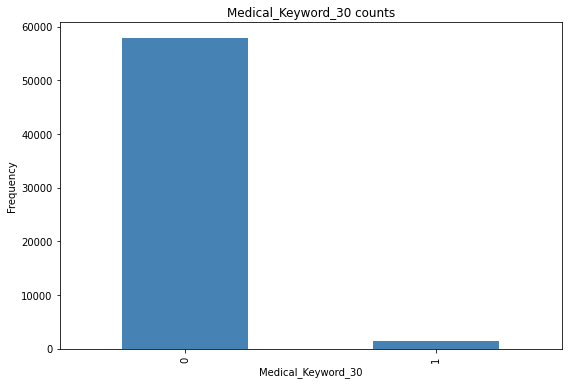

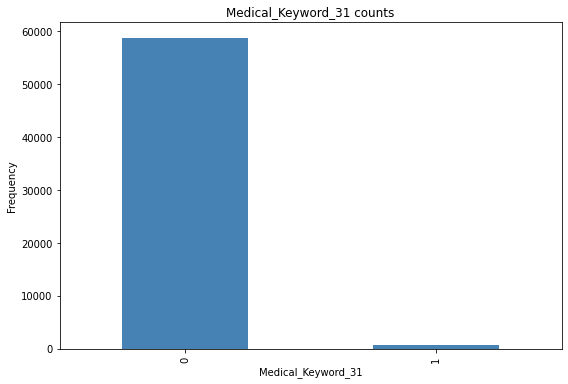

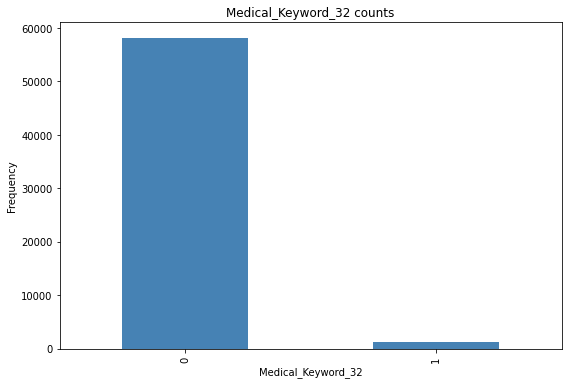

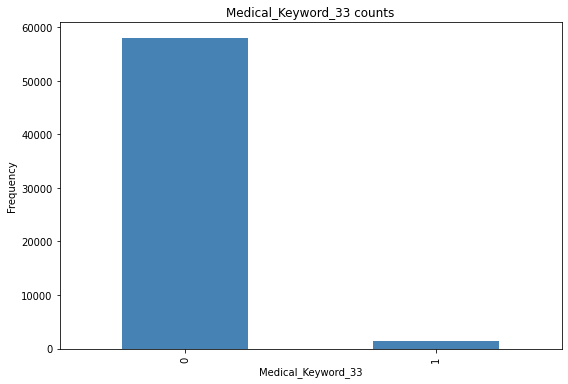

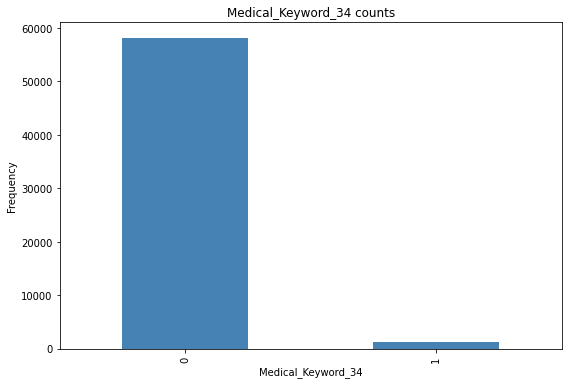

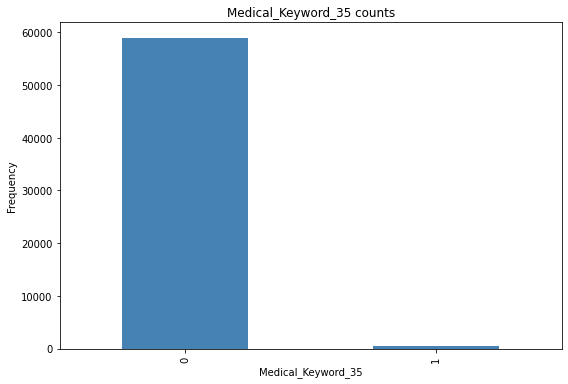

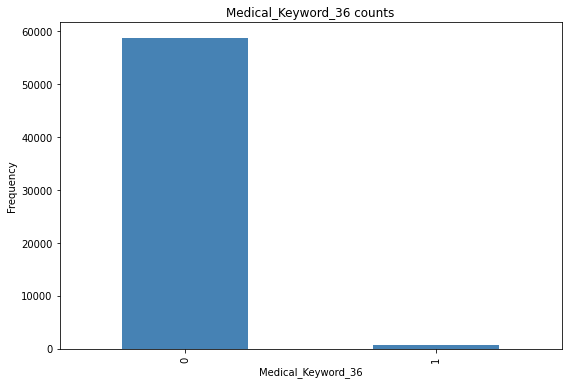

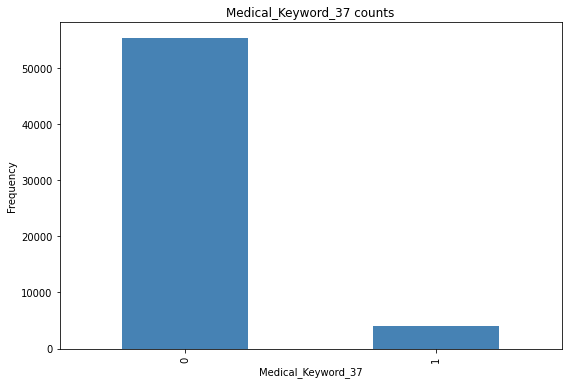

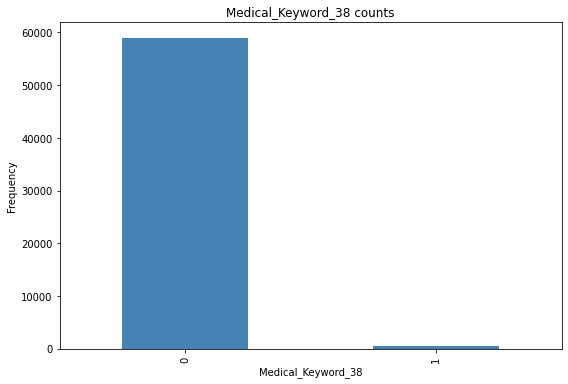

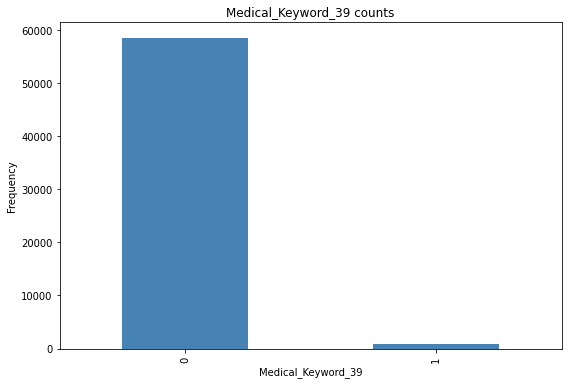

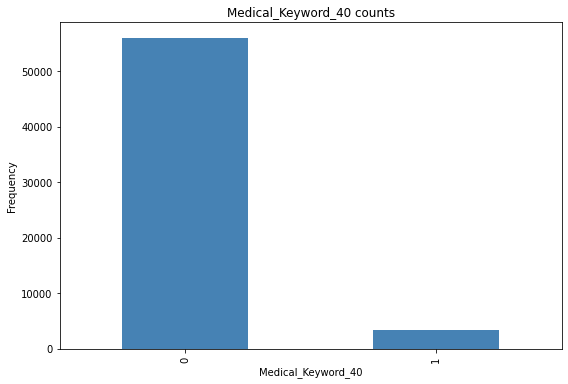

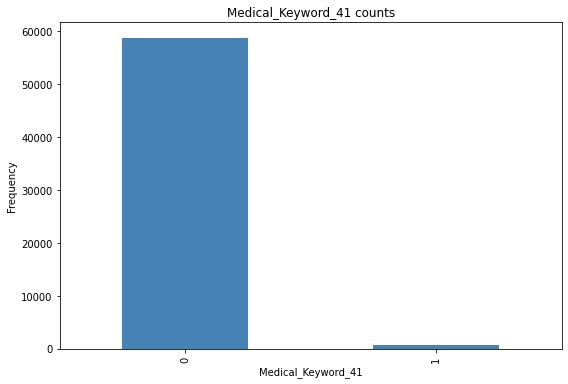

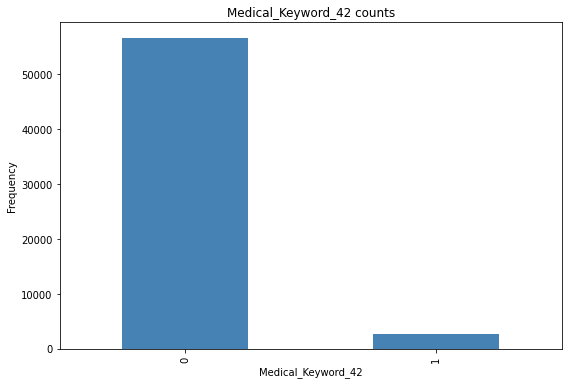

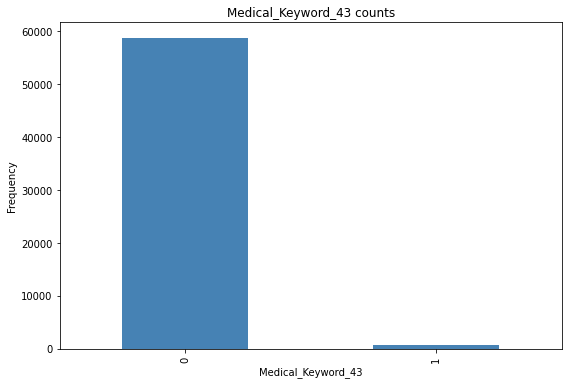

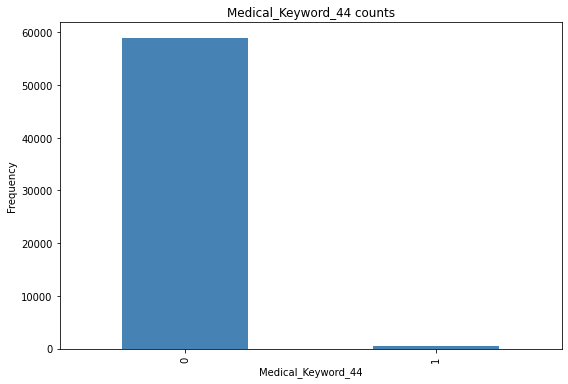

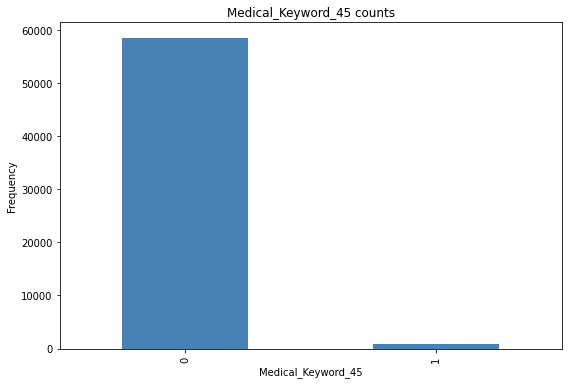

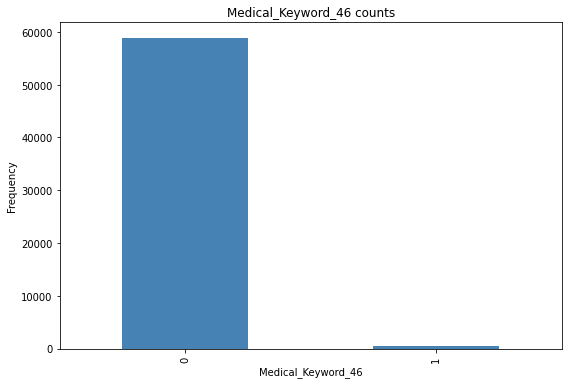

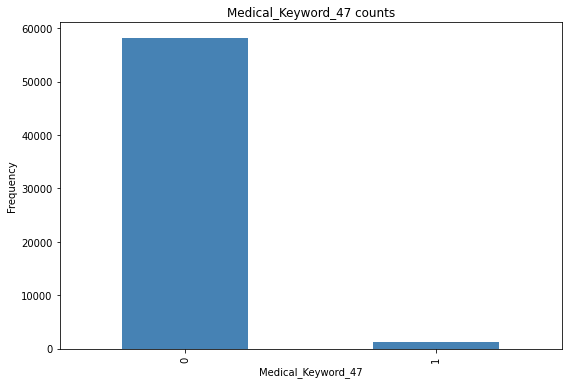

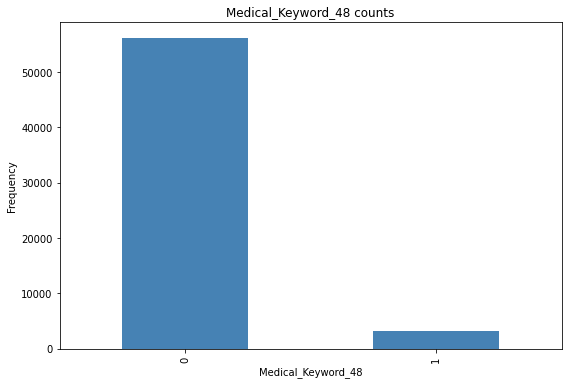

In [ ]:
# Doing count plots for categorical
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


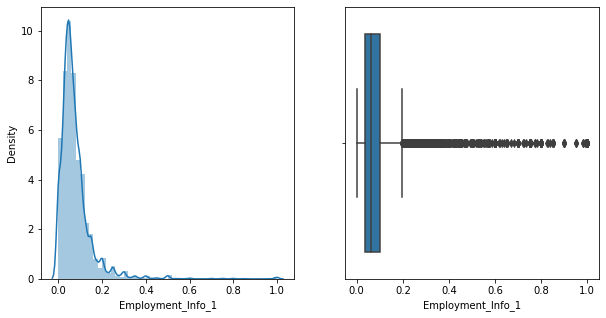

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_1'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_1'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


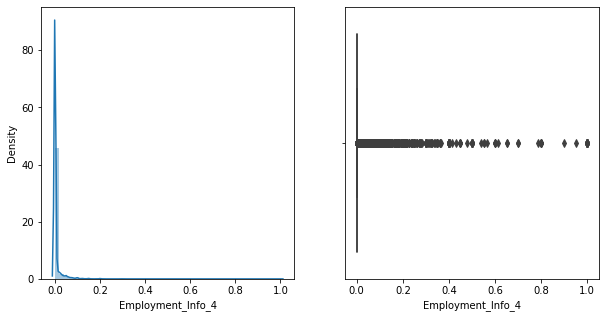

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_4'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_4'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


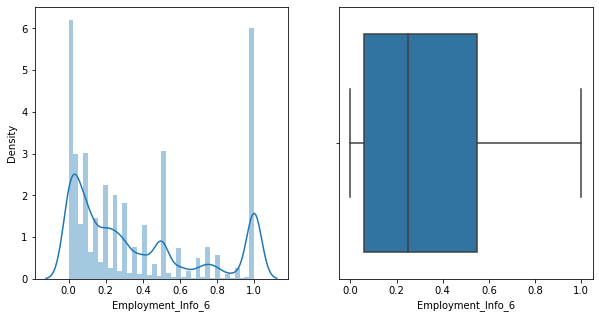

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_6'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_6'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


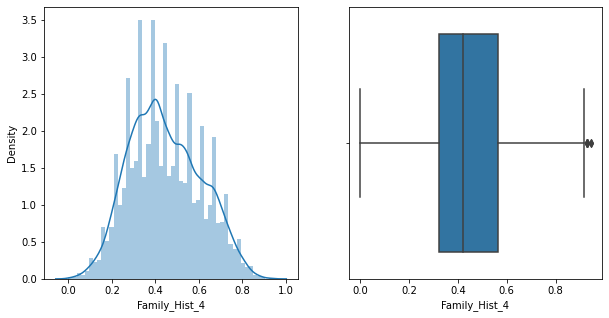

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Family_Hist_4'], ax=axes[0])
sns.boxplot(insurance_df['Family_Hist_4'], ax=axes[1])

In [ ]:
# Checked correlated feature with greater than .99 here 
corr = insurance_df.corr()
corr_greater_than_90 = corr[corr>=.99]
corr_greater_than_90

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Medical_Keyword_45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

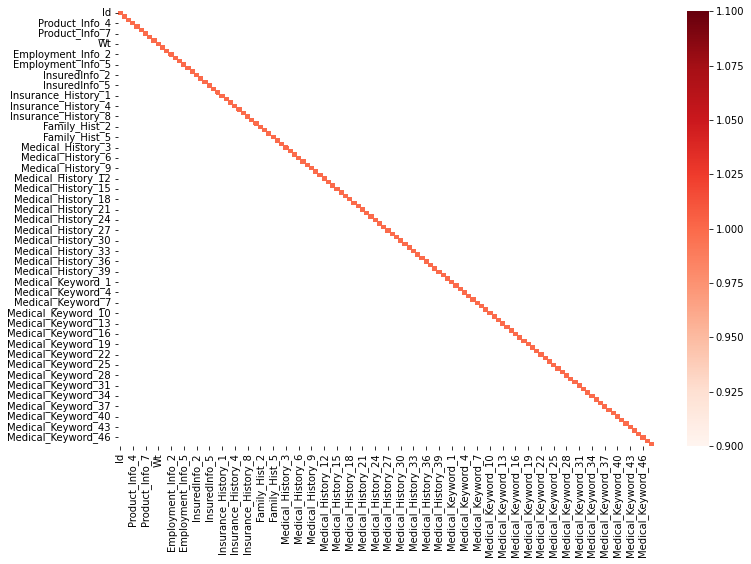

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_90, cmap="Reds");

In [ ]:
#checking percentage of missing values in a column
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [ ]:
# Does not contain important information
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

In [ ]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)
print(X.shape)
# Data for the dependent variable
Y = insurance_df['Modified_Response']
print(Y)

In [ ]:
# Filling remaining missing values with mean
X = X.fillna(X.mean())

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[0.02023155 0.00369007 0.00612558 0.03317646 0.00122058 0.00889937
 0.00280279 0.02803875 0.02272749 0.06659654 0.10242316 0.02003539
 0.0142972  0.00513493 0.01162098 0.0053219  0.02012838 0.00994839
 0.0020976  0.01791757 0.00693529 0.00188448 0.01891096 0.0029562
 0.00587658 0.00291282 0.00374723 0.00718643 0.01237725 0.00544634
 0.00698128 0.00408729 0.01115908 0.01850481 0.01604673 0.02043385
 0.01232008 0.01946254 0.01931023 0.00608946 0.05168793 0.00208842
 0.00349059 0.00199399 0.00434704 0.00887033 0.00078407 0.00093457
 0.00348042 0.00498083 0.00195306 0.02800956 0.00667866 0.00232155
 0.00357332 0.00257735 0.0024475  0.0048771  0.00162188 0.04514962
 0.00439626 0.00581947 0.00571141 0.00080713 0.00450484 0.00770486
 0.00618213 0.00136756 0.00164474 0.00527817 0.0076445  0.00013478
 0.0062855  0.00373623 0.00032987 0.00851518 0.00206373 0.00986121
 0.00220714 0.00085348 0.01021899 0.00144922 0.00092291 0.0017643
 0.00133155 0.0010607  0.00075585 0.0023351  0.0036131  0.001111

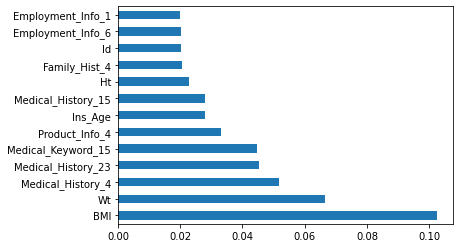

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(13).plot(kind='barh') 
plt.show()

In [ ]:
insurance_df1 = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
insurance_df1['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [ ]:
#Combining the Categores to 3 categories
insurance_df1['Modified_Response']  = insurance_df1['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

In [ ]:
X1=insurance_df1[['Employment_Info_1','Family_Hist_4','InsuredInfo_6','Ht','Ins_Age','Medical_History_15','Product_Info_4','Medical_Keyword_15','Medical_History_23','Medical_History_4','Wt','BMI']]
Y1=insurance_df1['Modified_Response']
X1.head()

,Employment_Info_1,Family_Hist_4,InsuredInfo_6,Ht,Ins_Age,Medical_History_15,Product_Info_4,Medical_Keyword_15,Medical_History_23,Medical_History_4,Wt,BMI
0,0.028,NaN,2,0.581818,0.641791,240.0,0.076923,0,3,1,0.148536,0.323008
1,0.000,0.084507,2,0.600000,0.059701,0.0,0.076923,0,3,1,0.131799,0.272288
2,0.030,0.225352,1,0.745455,0.029851,NaN,0.076923,0,3,2,0.288703,0.428780
3,0.042,0.352113,2,0.672727,0.164179,NaN,0.487179,0,3,2,0.205021,0.352438
4,0.027,0.408451,2,0.654545,0.417910,NaN,0.230769,0,3,2,0.234310,0.424046


In [ ]:
X2=insurance_df1[['Employment_Info_1','Family_Hist_4','InsuredInfo_6','Ht','Ins_Age','Medical_History_15','Product_Info_4','Medical_Keyword_15','Medical_History_23','Medical_History_4','Wt','BMI','Modified_Response']]
X2

,Employment_Info_1,Family_Hist_4,InsuredInfo_6,Ht,Ins_Age,Medical_History_15,Product_Info_4,Medical_Keyword_15,Medical_History_23,Medical_History_4,Wt,BMI,Modified_Response
0,0.028,NaN,2,0.581818,0.641791,240.0,0.076923,0,3,1,0.148536,0.323008,1
1,0.000,0.084507,2,0.600000,0.059701,0.0,0.076923,0,3,1,0.131799,0.272288,0
2,0.030,0.225352,1,0.745455,0.029851,NaN,0.076923,0,3,2,0.288703,0.428780,1
3,0.042,0.352113,2,0.672727,0.164179,NaN,0.487179,0,3,2,0.205021,0.352438,1
4,0.027,0.408451,2,0.654545,0.417910,NaN,0.230769,0,3,2,0.234310,0.424046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0.020,0.197183,2,0.709091,0.074627,32.0,0.230769,0,3,1,0.320084,0.519103,0
59377,0.100,0.478873,1,0.800000,0.432836,NaN,0.230769,0,3,2,0.403766,0.551119,0
59378,0.035,0.126761,1,0.745455,0.104478,NaN,0.076923,0,3,2,0.246862,0.360969,1
59379,0.038,0.704225,2,0.690909,0.507463,240.0,0.230769,0,3,1,0.276151,0.462452,1


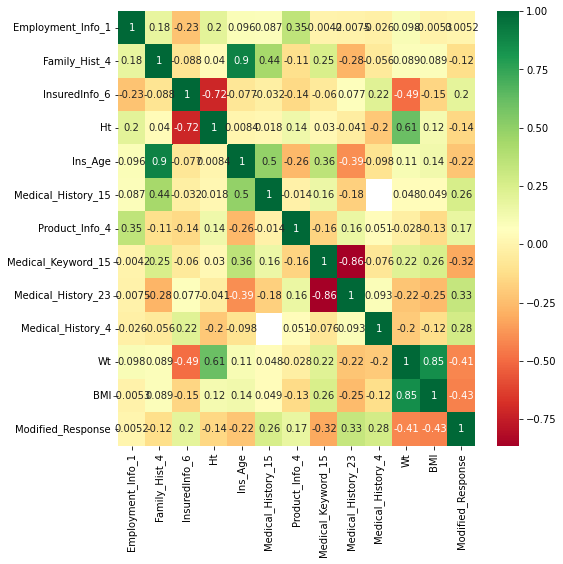

In [ ]:
# corr() -> to find coreeltion between numneric values
corrmat=X2.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(8,8)) 
#plot heat map 
#heighesst value -> highly corelates
# sighs represent proportinality 
g=sns.heatmap(X2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


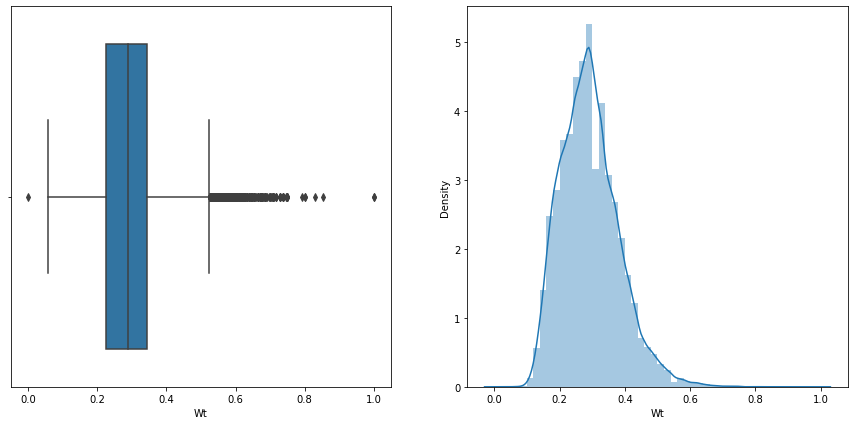

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Wt', data=X1,  orient='v' , ax=axes[0])
sns.distplot(X1['Wt'],  ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


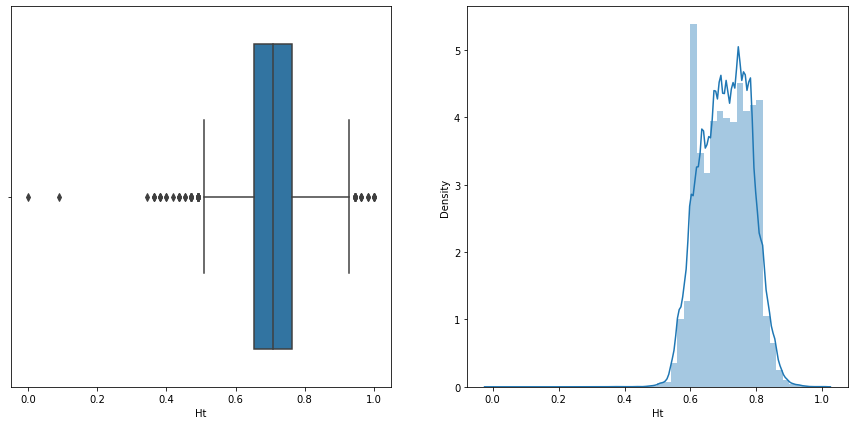

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ht', data=X1,  orient='v' , ax=axes[0])
sns.distplot(X1['Ht'],  ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


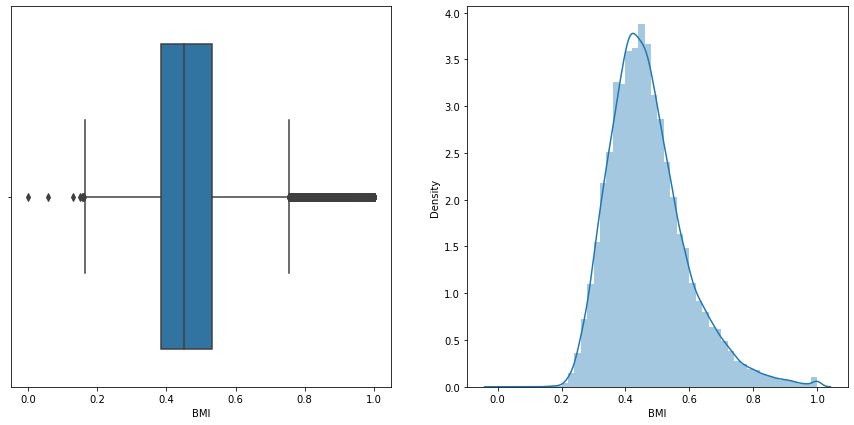

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'BMI', data=X1,  orient='v' , ax=axes[0])
sns.distplot(X1['BMI'],  ax=axes[1])

In [ ]:
# Filling remaining missing values with mean
X1 = X1.fillna(X1.mean())

In [ ]:
print(X1.shape)
Y1.shape

(59381, 12)


(59381,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1,test_size = 0.2, random_state=1)

In [ ]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(47504, 12) (47504,)
(11877, 12) (11877,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

### KNN

In [ ]:
result2=[]

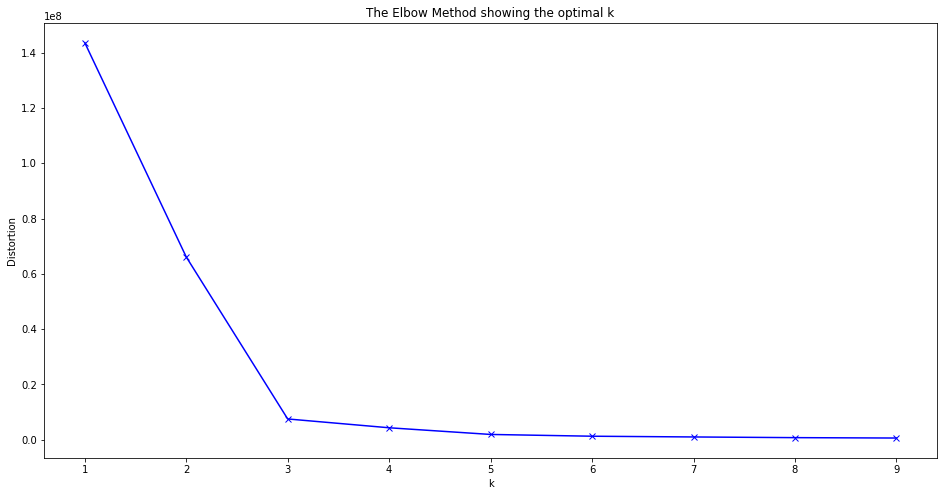

In [ ]:
# To plot the Elbow Diagram

from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Modelling KNN

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
kn.fit(X_res,y_res)
knn_y_pred5 = kn.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,knn_y_pred5)
print(' \n The confusion matrix and accuracy score for n_neighbors = \n')
print(cm)
print(' \n The accuracy score for n_neighbors = ','\n')
print(accuracy_score(y_test,knn_y_pred5))
acc_knn5=accuracy_score(y_test,knn_y_pred5)  
result2.append(acc_knn5)

 
 The confusion matrix and accuracy score for n_neighbors = 

[[6119 1900]
 [ 906 2952]]
 
 The accuracy score for n_neighbors =  

0.7637450534646796


#### A function to get best parameters for KNN

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn15 = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3,4,5]
    }
cv = GridSearchCV(kn15, parameters, cv=5)
cv.fit(X_res,y_res)

print_results(cv)

BEST PARAMS: {'n_neighbors': 3}

0.836 (+/-0.03) for {'n_neighbors': 3}
0.829 (+/-0.041) for {'n_neighbors': 4}
0.829 (+/-0.028) for {'n_neighbors': 5}


### Naive Bayes

In [ ]:
  from sklearn.naive_bayes import GaussianNB
  nb=GaussianNB()
  nb.fit(X_res,y_res)
  
  nb_y_pred5 = nb.predict(X_test)
  
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm=confusion_matrix(y_test,nb_y_pred5)
  print(' \n The confusion matrix for Naive Bayes is = ','\n')
  print(cm)
  print(' \n The accuracy score for Naive Bayes is = ','\n')
  print(accuracy_score(y_test,nb_y_pred5))
  acc_nb5=accuracy_score(y_test,nb_y_pred5)  
  result2.append(acc_nb5)

 
 The confusion matrix for Naive Bayes is =  

[[5304 2715]
 [ 406 3452]]
 
 The accuracy score for Naive Bayes is =  

0.7372232045129241


### Decision Tree Classifier

#### CART: Uses gini index as criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cart=DecisionTreeClassifier(criterion='gini',random_state=0)
cart.fit(X_res,y_res)

DecisionTreeClassifier(random_state=0)

In [ ]:
cart_y_pred5=cart.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,cart_y_pred5)
print(' \n The confusion matrix for CART is = ','\n')
print(cm)
print(' \n The accuracy score for CART is = ','\n')
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,cart_y_pred5))
acc_cart5=accuracy_score(y_test,cart_y_pred5)  
result2.append(acc_cart5)

 
 The confusion matrix for CART is =  

[[6474 1545]
 [1290 2568]]
 
 The accuracy score for CART is =  

0.7613033594342006


#### C 5.0: Uses Entropy as Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier

c5=DecisionTreeClassifier(criterion='entropy',random_state=0)
c5.fit(X_res,y_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
c5_y_pred5=c5.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,c5_y_pred5)
print(cm)
print(' \n The confusion matrix for C5.0 is = ','\n')
from sklearn.metrics import accuracy_score
print(' \n The accuracy score for C5.0 is = ','\n')
print(accuracy_score(y_test,c5_y_pred5))
acc_c55=accuracy_score(y_test,c5_y_pred5)  
result2.append(acc_c55)

[[6467 1552]
 [1317 2541]]
 
 The confusion matrix for C5.0 is =  

 
 The accuracy score for C5.0 is =  

0.7584406836743285


### Random forest Classifier

In [ ]:
# Modelling Random Forest

from sklearn.ensemble import RandomForestClassifier
rf5=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rf5.fit(X_res,y_res)
rf_y_pred5 = rf5.predict(X_test)
  
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,rf_y_pred5)
print(' \n The confusion matrix for no. of trees = ','\n')
print(cm)
print(' \n The accuracy score for no. of trees = ','\n')
print(accuracy_score(y_test,rf_y_pred5))
acc_rf5=accuracy_score(y_test,rf_y_pred5)  
result2.append(acc_rf5)

 
 The confusion matrix for no. of trees =  

[[6510 1509]
 [ 759 3099]]
 
 The accuracy score for no. of trees =  

0.8090426875473604


#### A function to get best parameters for Random Forest

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf15 = RandomForestClassifier()
parameters = {
    'n_estimators': [50,100,150,200,250],
    'criterion':['entropy','gini']
    
}
cv = GridSearchCV(rf15, parameters, cv=5)
cv.fit(X_res,y_res)

print_results(cv)

BEST PARAMS: {'criterion': 'gini', 'n_estimators': 250}

0.856 (+/-0.048) for {'criterion': 'entropy', 'n_estimators': 50}
0.858 (+/-0.049) for {'criterion': 'entropy', 'n_estimators': 100}
0.857 (+/-0.047) for {'criterion': 'entropy', 'n_estimators': 150}
0.858 (+/-0.047) for {'criterion': 'entropy', 'n_estimators': 200}
0.858 (+/-0.047) for {'criterion': 'entropy', 'n_estimators': 250}
0.857 (+/-0.05) for {'criterion': 'gini', 'n_estimators': 50}
0.857 (+/-0.05) for {'criterion': 'gini', 'n_estimators': 100}
0.857 (+/-0.046) for {'criterion': 'gini', 'n_estimators': 150}
0.858 (+/-0.047) for {'criterion': 'gini', 'n_estimators': 200}
0.858 (+/-0.047) for {'criterion': 'gini', 'n_estimators': 250}


### ANN

#### Initializing Neural Network

In [ ]:
# Initializing the ANN
import tensorflow as tf

ann5 = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann5.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the second hidden layer
ann5.add(tf.keras.layers.Dense(units=12, activation='relu'))

ann5.add(tf.keras.layers.Dense(units=12, activation='relu'))
# Adding the output layer
ann5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiling the ANN

In [ ]:
ann5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Training the ANN on the Training set

In [ ]:
ann5.fit(X_res,y_res, batch_size =32 , epochs = 200)

Epoch 1/200
1993/1993 [==============================] - 4s 2ms/step - loss: 0.5417 - accuracy: 0.7139
Epoch 2/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4687 - accuracy: 0.7724
Epoch 3/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4472 - accuracy: 0.7888
Epoch 4/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4409 - accuracy: 0.7946
Epoch 5/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4340 - accuracy: 0.7991
Epoch 6/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4349 - accuracy: 0.7989
Epoch 7/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4285 - accuracy: 0.8023
Epoch 8/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4292 - accuracy: 0.8014
Epoch 9/200
1993/1993 [==============================] - 3s 2ms/step - loss: 0.4259 - accuracy: 0.8041
Epoch 10/200
1993/1993 [==============================] - 3s 2ms/step - l

#### Making predictions and evaluating the model

In [ ]:
ann_y_pred5 = ann5.predict(X_test)
ann_y_pred5 = (ann_y_pred5 > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ann_y_pred5)
print(' \n The confusion Matrix for ANN ','\n')
print(cm)

from sklearn.metrics import accuracy_score
print(' \n The accuracy score for ANN ','\n')
print(accuracy_score(y_test,ann_y_pred5))
acc_ann5=accuracy_score(y_test,ann_y_pred5)  
result2.append(acc_ann5)

 
 The confusion Matrix for ANN  

[[6339 1680]
 [ 742 3116]]
 
 The accuracy score for ANN  

0.7960764502820578


## AUC/ROC curve

AUC Value for 'K Neighbors Classifier' =  0.7641130115353951
AUC Value for 'Naive Bayes' =  0.77809661618198
AUC Value for 'Decision Tree_CART' =  0.7364812225707336
AUC Value for 'Decision Tree_C5.0' =  0.7325455367762839
AUC Value for 'Random Forest' =  0.8075439319175279
AUC Value for 'Artificial Neural Network' =  0.7990849686892543


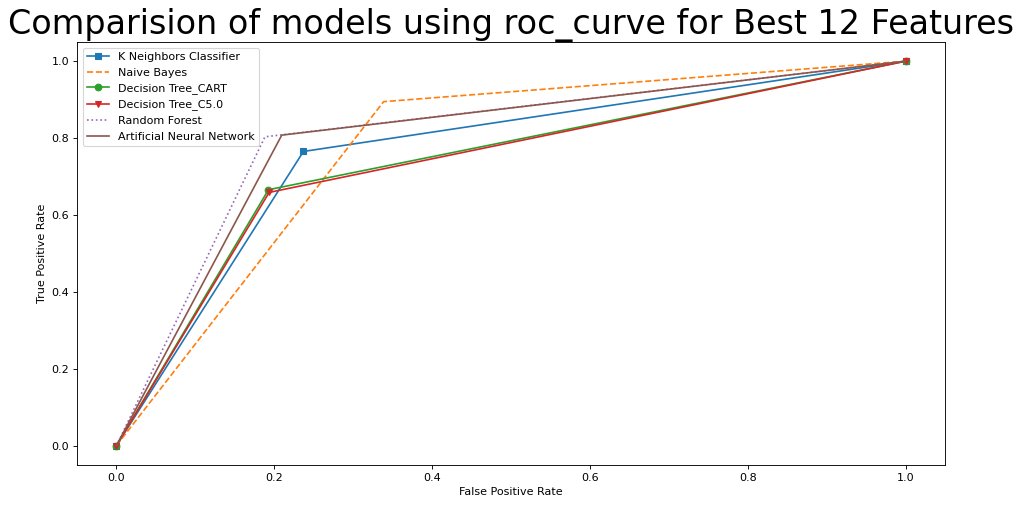

In [ ]:
#Comparision of models using roc_curve

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure
result3=[]

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

knn_fpr5, knn_tpr5, _ = roc_curve(y_test, knn_y_pred5)
nb_fpr5, nb_tpr5, _ = roc_curve(y_test, nb_y_pred5)
cart_fpr5, cart_tpr5, _ = roc_curve(y_test, cart_y_pred5)
c5_fpr5, c5_tpr5, _ = roc_curve(y_test, c5_y_pred5)
rf_fpr5, rf_tpr5, _ = roc_curve(y_test, rf_y_pred5)
ann_fpr5, ann_tpr5, _ = roc_curve(y_test, ann_y_pred5)

# plot the roc curve for the model

pyplot.plot(knn_fpr5, knn_tpr5, marker='s', label='K Neighbors Classifier')
pyplot.plot(nb_fpr5, nb_tpr5, linestyle='--', label='Naive Bayes')
pyplot.plot(cart_fpr5, cart_tpr5, marker='o', label='Decision Tree_CART')
pyplot.plot(c5_fpr5, c5_tpr5, marker='v', label='Decision Tree_C5.0')
pyplot.plot(rf_fpr5, rf_tpr5, linestyle=':', label='Random Forest')
pyplot.plot(ann_fpr5, ann_tpr5, linestyle='-', label='Artificial Neural Network')

# Printing values for AUC

print("AUC Value for 'K Neighbors Classifier' = ",auc(knn_fpr5, knn_tpr5))
k1=auc(knn_fpr5, knn_tpr5)
result3.append(k1)
print("AUC Value for 'Naive Bayes' = ",auc(nb_fpr5, nb_tpr5))
n1=auc(nb_fpr5, nb_tpr5)
result3.append(n1)
print("AUC Value for 'Decision Tree_CART' = ",auc(cart_fpr5, cart_tpr5))
c1=auc(cart_fpr5, cart_tpr5)
result3.append(c1)
print("AUC Value for 'Decision Tree_C5.0' = ",auc(c5_fpr5, c5_tpr5))
c12=auc(c5_fpr5, c5_tpr5)
result3.append(c12)
print("AUC Value for 'Random Forest' = ",auc(rf_fpr5, rf_tpr5))
r1=auc(rf_fpr5, rf_tpr5)
result3.append(r1)
print("AUC Value for 'Artificial Neural Network' = ",auc(ann_fpr5, ann_tpr5))
a1=auc(ann_fpr5, ann_tpr5)
result3.append(a1)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Comparision of models using roc_curve for Best 12 Features", fontsize=30)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
results1 = pd.DataFrame({ "Models":["KNN",
                                  "Naive Bayes",
                                  "CART",
                                  "C5.0",
                                  "RandomForest",
                                  "ANN"
                                  ],
                        "Model Accuracy":result2,
                        "AUC":result3
                        })
results1

,Models,Model Accuracy,AUC
0,KNN,0.763745,0.764113
1,Naive Bayes,0.737223,0.778097
2,CART,0.761303,0.736481
3,C5.0,0.758441,0.732546
4,RandomForest,0.809043,0.807544
5,ANN,0.796076,0.799085
